
<center><h1>Hacktiv8-PTP Python For Data Science // S.7 // Basic Visualization</h1></center>
<hr>

## Exploring Datasets with pandas

The Dataset: Immigration to Canada from 1980 to 2013
Dataset Source: International migration flows to and from selected countries - The 2015 revision.

Dataset tersebut berisi data tahunan arus imigran internasional yang dicatat oleh negara tujuan. Data tersebut menyajikan baik arus masuk maupun arus keluar menurut tempat lahir, kewarganegaraan atau tempat tinggal sebelumnya / selanjutnya baik bagi asing maupun warga negara. Versi saat ini menyajikan data yang berkaitan dengan 45 negara.

Di sesi ini, kita akan fokus pada data imigrasi Kanada.

pandas Basics
Sembari kita merivew yang telah kita pelajari di minggu lalu, kita akan melakukan beberapa hal dengan Pandas.

Hal pertama yang akan kita lakukan adalah mengimpor dua modul analisis data utama: Pandas dan Numpy.



In [159]:
##pip install pandas=1.2.5

In [166]:

import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

In [161]:
print(pd.__version__)

1.3.5


Mari impor set data Imigrasi Kanada utama kita menggunakan metode pandas read_excel(). Biasanya, sebelum kita bisa melakukannya, kita perlu mengunduh modul yang dibutuhkan pandas untuk membaca file excel. Modul ini bernama xlrd.



In [162]:
!conda install -c anaconda xlrd --yes


Solving environment: - ^C
failed with initial frozen solve. Retrying with flexible solve.

CondaError: KeyboardInterrupt



In [ ]:
pip install xlrd 

You should consider upgrading via the '/Users/iketutg/MyKetut/workspace_python/__H8-PYTN071/env_pytn071/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install openpyxl

You should consider upgrading via the '/Users/iketutg/MyKetut/workspace_python/__H8-PYTN071/env_pytn071/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


 Kita coba mendownload atau melihat file xls tersebut yang akan kita ambil adalah pada sheet ke dua dengan nama "Canada by Citizenship" 
 Membersihkan data beberapa kolom yang rangkap 
 Merename beberapa kolom 

In [167]:
df_can = pd.read_excel('https://github.com/ardhiraka/PFDS_sources/blob/master/Canada.xlsx?raw=true',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2) #engine='openpyxl'

                  

print ('Data read into a pandas dataframe!')


Data read into a pandas dataframe!


In [168]:
df_can.head()
# tip: You can specify the number of rows you'd like to see as follows: df_can.head(10) 

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [169]:
df_can.tail()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
190,Immigrants,Foreigners,Viet Nam,935,Asia,920,South-Eastern Asia,902,Developing regions,1191,...,1816,1852,3153,2574,1784,2171,1942,1723,1731,2112
191,Immigrants,Foreigners,Western Sahara,903,Africa,912,Northern Africa,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
192,Immigrants,Foreigners,Yemen,935,Asia,922,Western Asia,902,Developing regions,1,...,124,161,140,122,133,128,211,160,174,217
193,Immigrants,Foreigners,Zambia,903,Africa,910,Eastern Africa,902,Developing regions,11,...,56,91,77,71,64,60,102,69,46,59
194,Immigrants,Foreigners,Zimbabwe,903,Africa,910,Eastern Africa,902,Developing regions,72,...,1450,615,454,663,611,508,494,434,437,407


In [170]:
#df_can.dropna(inplace=True)

df_can.dropna(axis=1, how='all',inplace=True)


In [171]:
df_can.columns

Index([    'Type', 'Coverage',   'OdName',     'AREA', 'AreaName',      'REG',
        'RegName',      'DEV',  'DevName',       1980,       1981,       1982,
             1983,       1984,       1985,       1986,       1987,       1988,
             1989,       1990,       1991,       1992,       1993,       1994,
             1995,       1996,       1997,       1998,       1999,       2000,
             2001,       2002,       2003,       2004,       2005,       2006,
             2007,       2008,       2009,       2010,       2011,       2012,
             2013],
      dtype='object')

In [172]:
df_can.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 43 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Type      195 non-null    object
 1   Coverage  195 non-null    object
 2   OdName    195 non-null    object
 3   AREA      195 non-null    int64 
 4   AreaName  195 non-null    object
 5   REG       195 non-null    int64 
 6   RegName   195 non-null    object
 7   DEV       195 non-null    int64 
 8   DevName   195 non-null    object
 9   1980      195 non-null    int64 
 10  1981      195 non-null    int64 
 11  1982      195 non-null    int64 
 12  1983      195 non-null    int64 
 13  1984      195 non-null    int64 
 14  1985      195 non-null    int64 
 15  1986      195 non-null    int64 
 16  1987      195 non-null    int64 
 17  1988      195 non-null    int64 
 18  1989      195 non-null    int64 
 19  1990      195 non-null    int64 
 20  1991      195 non-null    int64 
 21  1992      195 no

In [173]:
df_can.loc[:,1980:2013]= df_can.loc[:,1980:2013].astype('Int64')

In [174]:
df_can.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 43 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Type      195 non-null    object
 1   Coverage  195 non-null    object
 2   OdName    195 non-null    object
 3   AREA      195 non-null    int64 
 4   AreaName  195 non-null    object
 5   REG       195 non-null    int64 
 6   RegName   195 non-null    object
 7   DEV       195 non-null    int64 
 8   DevName   195 non-null    object
 9   1980      195 non-null    Int64 
 10  1981      195 non-null    Int64 
 11  1982      195 non-null    Int64 
 12  1983      195 non-null    Int64 
 13  1984      195 non-null    Int64 
 14  1985      195 non-null    Int64 
 15  1986      195 non-null    Int64 
 16  1987      195 non-null    Int64 
 17  1988      195 non-null    Int64 
 18  1989      195 non-null    Int64 
 19  1990      195 non-null    Int64 
 20  1991      195 non-null    Int64 
 21  1992      195 no

In [175]:
df_can.columns.values 

array(['Type', 'Coverage', 'OdName', 'AREA', 'AreaName', 'REG', 'RegName',
       'DEV', 'DevName', 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987,
       1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
       1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013], dtype=object)

In [176]:
df_can.index.values

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [ ]:
# size of dataframe (rows, columns)
df_can.shape

(195, 43)


Mari bersihkan dataset dengan menghapus beberapa kolom yang tidak perlu. Kita bisa menggunakan metode pandas drop() sebagai berikut:

In [ ]:
df_can.tail()

In [177]:
# in pandas axis=0 represents rows (default) and axis=1 represents columns.
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)
df_can.head(2)

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603


Mari ganti nama kolom agar make sense. Kita bisa menggunakan metode rename() dengan memasukkan dictionary nama lama dan baru sebagai berikut:



In [178]:
df_can.dropna(axis=0,inplace=True)
df_can.tail(2)

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
193,Zambia,Africa,Eastern Africa,Developing regions,11,17,11,7,16,9,...,56,91,77,71,64,60,102,69,46,59
194,Zimbabwe,Africa,Eastern Africa,Developing regions,72,114,102,44,32,29,...,1450,615,454,663,611,508,494,434,437,407


In [ ]:
df_can.drop(df_can.tail(2).index,inplace=True) # drop last n rows


In [179]:
df_can.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195 entries, 0 to 194
Data columns (total 38 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   OdName    195 non-null    object
 1   AreaName  195 non-null    object
 2   RegName   195 non-null    object
 3   DevName   195 non-null    object
 4   1980      195 non-null    Int64 
 5   1981      195 non-null    Int64 
 6   1982      195 non-null    Int64 
 7   1983      195 non-null    Int64 
 8   1984      195 non-null    Int64 
 9   1985      195 non-null    Int64 
 10  1986      195 non-null    Int64 
 11  1987      195 non-null    Int64 
 12  1988      195 non-null    Int64 
 13  1989      195 non-null    Int64 
 14  1990      195 non-null    Int64 
 15  1991      195 non-null    Int64 
 16  1992      195 non-null    Int64 
 17  1993      195 non-null    Int64 
 18  1994      195 non-null    Int64 
 19  1995      195 non-null    Int64 
 20  1996      195 non-null    Int64 
 21  1997      195 no

In [180]:
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
df_can.columns

Index([  'Country', 'Continent',    'Region',   'DevName',        1980,
              1981,        1982,        1983,        1984,        1985,
              1986,        1987,        1988,        1989,        1990,
              1991,        1992,        1993,        1994,        1995,
              1996,        1997,        1998,        1999,        2000,
              2001,        2002,        2003,        2004,        2005,
              2006,        2007,        2008,        2009,        2010,
              2011,        2012,        2013],
      dtype='object')

Kita juga akan menambahkan kolom 'Total' yang merangkum total imigran menurut negara selama periode 1980 - 2013, sebagai berikut:

In [181]:
df_can['Total'] = df_can.sum(axis=1,numeric_only=True) # horizontal / columns  , axis =0 vertical / rows 
df_can.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


In [182]:
df_can['Total'] = df_can['Total'].astype('Int64')
df_can.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


In [183]:

print( df_can.groupby('Region').sum())

#df.groupby(['col_1', 'col_2'], as_index=False).mean()
#print( df_can.groupby('Country').sum())


                            1980   1981   1982   1983   1984   1985   1986  \
Region                                                                       
Australia and New Zealand   1304   1119    848    457    481    467    532   
Caribbean                   7045   8310   8326   6998   5553   6048   8716   
Central America              734    921   1612   3648   4087   4862   5909   
Central Asia                   0      0      0      0      0      0      0   
Eastern Africa              1471   1641   1426   1094   1187   1134   1454   
Eastern Asia                6836   8895   5481   3254   2624   2979   3416   
Eastern Europe              1467   3698   6873   5459   4433   3969   6144   
Melanesia                    632    707    816    558    391    448    362   
Micronesia                     1      0      0      1      0      0      0   
Middle Africa                 33     27     44     32     42     30     61   
Northern Africa             1100   1268   1348    936    842    

Kita dapat memeriksa untuk melihat berapa banyak objek null yang kita miliki dalam dataset sebagai berikut:



In [184]:
df_can.isnull().sum()


Country      0
Continent    0
Region       0
DevName      0
1980         0
1981         0
1982         0
1983         0
1984         0
1985         0
1986         0
1987         0
1988         0
1989         0
1990         0
1991         0
1992         0
1993         0
1994         0
1995         0
1996         0
1997         0
1998         0
1999         0
2000         0
2001         0
2002         0
2003         0
2004         0
2005         0
2006         0
2007         0
2008         0
2009         0
2010         0
2011         0
2012         0
2013         0
Total        0
dtype: int64

Terakhir, mari kita lihat ringkasan singkat dari setiap kolom dalam kerangka data kita menggunakan metode describe().



In [185]:
df_can.describe()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,508.394872,566.989744,534.723077,387.435897,376.497436,358.861538,441.271795,691.133333,714.389744,843.241026,...,1320.292308,1266.958974,1191.820513,1246.394872,1275.733333,1420.287179,1262.533333,1313.958974,1320.702564,32867.451282
std,1949.588546,2152.643752,1866.997511,1204.333597,1198.246371,1079.309600,1225.576630,2109.205607,2443.606788,2555.048874,...,4425.957828,3926.717747,3443.542409,3694.573544,3829.630424,4462.946328,4030.084313,4247.555161,4237.951988,91785.498686
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,1.000000,1.000000,...,28.500000,25.000000,31.000000,31.000000,36.000000,40.500000,37.500000,42.500000,45.000000,952.000000
50%,13.000000,10.000000,11.000000,12.000000,13.000000,17.000000,18.000000,26.000000,34.000000,44.000000,...,210.000000,218.000000,198.000000,205.000000,214.000000,211.000000,179.000000,233.000000,213.000000,5018.000000
75%,251.500000,295.500000,275.000000,173.000000,181.000000,197.000000,254.000000,434.000000,409.000000,508.500000,...,832.000000,842.000000,899.000000,934.500000,888.000000,932.000000,772.000000,783.000000,796.000000,22239.500000
max,22045.000000,24796.000000,20620.000000,10015.000000,10170.000000,9564.000000,9470.000000,21337.000000,27359.000000,23795.000000,...,42584.000000,33848.000000,28742.000000,30037.000000,29622.000000,38617.000000,36765.000000,34315.000000,34129.000000,691904.000000


In [ ]:
df_can.describe()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,508.394872,566.989744,534.723077,387.435897,376.497436,358.861538,441.271795,691.133333,714.389744,843.241026,...,1320.292308,1266.958974,1191.820513,1246.394872,1275.733333,1420.287179,1262.533333,1313.958974,1320.702564,32867.451282
std,1949.588546,2152.643752,1866.997511,1204.333597,1198.246371,1079.309600,1225.576630,2109.205607,2443.606788,2555.048874,...,4425.957828,3926.717747,3443.542409,3694.573544,3829.630424,4462.946328,4030.084313,4247.555161,4237.951988,91785.498686
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,1.000000,1.000000,...,28.500000,25.000000,31.000000,31.000000,36.000000,40.500000,37.500000,42.500000,45.000000,952.000000
50%,13.000000,10.000000,11.000000,12.000000,13.000000,17.000000,18.000000,26.000000,34.000000,44.000000,...,210.000000,218.000000,198.000000,205.000000,214.000000,211.000000,179.000000,233.000000,213.000000,5018.000000
75%,251.500000,295.500000,275.000000,173.000000,181.000000,197.000000,254.000000,434.000000,409.000000,508.500000,...,832.000000,842.000000,899.000000,934.500000,888.000000,932.000000,772.000000,783.000000,796.000000,22239.500000
max,22045.000000,24796.000000,20620.000000,10015.000000,10170.000000,9564.000000,9470.000000,21337.000000,27359.000000,23795.000000,...,42584.000000,33848.000000,28742.000000,30037.000000,29622.000000,38617.000000,36765.000000,34315.000000,34129.000000,691904.000000


## pandas: Indexing and Selection (slicing)

Select Column
There are two ways to filter on a column name:

Metode 1: Cepat dan mudah, tetapi hanya berfungsi jika nama kolom TIDAK memiliki spasi atau karakter khusus.

In [ ]:
df.column_name  #(returns series)

In [ ]:
df['column']  
        (returns series)

In [ ]:
df[['column 1', 'column 2']] 
        (returns dataframe)

In [ ]:
df_can.Country  # returns a series


In [186]:
df_can[['Country', 1980, 1981, 1982, 1983, 1984, 1985]] # returns a dataframe
# notice that 'Country' is string, and the years are integers. 
# for the sake of consistency, we will convert all column names to string later on.

,Country,1980,1981,1982,1983,1984,1985
0,Afghanistan,16,39,39,47,71,340
1,Albania,1,0,0,0,0,0
2,Algeria,80,67,71,69,63,44
3,American Samoa,0,1,0,0,0,0
4,Andorra,0,0,0,0,0,0
...,...,...,...,...,...,...,...
190,Viet Nam,1191,1829,2162,3404,7583,5907
191,Western Sahara,0,0,0,0,0,0
192,Yemen,1,2,1,6,0,18
193,Zambia,11,17,11,7,16,9


## Select Row

Ada 2 cara utama untuk memilih baris:

df.loc[label]        
        #filters by the labels of the index/column
df.iloc[index]       
        #filters by the positions of the index/column

Sebelum kita melanjutkan, perhatikan bahwa indeks default dari dataset adalah rentang numerik dari 0 hingga 194. Hal ini membuatnya sangat sulit untuk melakukan kueri berdasarkan negara tertentu. Misalnya untuk mencari data di Jepang, kita perlu mengetahui nilai indeks yang sesuai.

Ini dapat diperbaiki dengan sangat mudah dengan menyetel kolom 'Country' sebagai indeks menggunakan metode set_index().

In [187]:
df_can.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            185, 186, 187, 188, 189, 190, 191, 192, 193, 194],
           dtype='int64', length=195)

In [188]:

df_can.set_index('Country', inplace=True)
# tip: Kebalikan dari set adalah reset. Jadi untuk mereset indeks, kita bisa menggunakan df_can.reset_index()

In [189]:
df_can.head(3)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439


In [190]:
# optional: to remove the name of the index
df_can.index.name = None

In [191]:
df_can.head(3)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439


Contoh: Mari kita lihat jumlah imigran dari Jepang (baris 87) untuk skenario berikut ini: 
1. Data baris lengkap (semua kolom) 
2. Untuk tahun 2013 
3. Untuk tahun 1980 hingga 1985



In [192]:

# 1. the full row data (all columns)
japan = df_can.loc['Japan']
print(japan)

Continent                 Asia
Region            Eastern Asia
DevName      Developed regions
1980                       701
1981                       756
1982                       598
1983                       309
1984                       246
1985                       198
1986                       248
1987                       422
1988                       324
1989                       494
1990                       379
1991                       506
1992                       605
1993                       907
1994                       956
1995                       826
1996                       994
1997                       924
1998                       897
1999                      1083
2000                      1010
2001                      1092
2002                       806
2003                       817
2004                       973
2005                      1067
2006                      1212
2007                      1250
2008                      1284
2009    

In [193]:

# alternate methods
print(df_can.iloc[87])

Continent                 Asia
Region            Eastern Asia
DevName      Developed regions
1980                       701
1981                       756
1982                       598
1983                       309
1984                       246
1985                       198
1986                       248
1987                       422
1988                       324
1989                       494
1990                       379
1991                       506
1992                       605
1993                       907
1994                       956
1995                       826
1996                       994
1997                       924
1998                       897
1999                      1083
2000                      1010
2001                      1092
2002                       806
2003                       817
2004                       973
2005                      1067
2006                      1212
2007                      1250
2008                      1284
2009    

In [194]:
print(df_can[df_can.index == 'Japan'].T.squeeze())

Continent                 Asia
Region            Eastern Asia
DevName      Developed regions
1980                       701
1981                       756
1982                       598
1983                       309
1984                       246
1985                       198
1986                       248
1987                       422
1988                       324
1989                       494
1990                       379
1991                       506
1992                       605
1993                       907
1994                       956
1995                       826
1996                       994
1997                       924
1998                       897
1999                      1083
2000                      1010
2001                      1092
2002                       806
2003                       817
2004                       973
2005                      1067
2006                      1212
2007                      1250
2008                      1284
2009    

In [195]:
# 2. for year 2013
print(df_can.loc['Japan', 2013])

# alternate method
print(df_can.iloc[87, 36]) # year 2013 is the last column, with a positional index of 36

982
982


In [196]:
# 3. for years 1980 to 1985
print(df_can.loc['Japan', [1980, 1981, 1982, 1983, 1984, 1985]]) # 
print(df_can.iloc[87, [3, 4, 5, 6, 7, 8]]) 

1980    701
1981    756
1982    598
1983    309
1984    246
1985    198
Name: Japan, dtype: object
1980    701
1981    756
1982    598
1983    309
1984    246
1985    198
Name: Japan, dtype: object


Nama kolom yang merupakan bilangan bulat (seperti tahun) mungkin menimbulkan kebingungan. Misalnya, ketika kita mengacu pada tahun 2013, orang mungkin bingung ketika 2013 adalah indeks posisi 2013.

Untuk menghindari ambuigitas ini, mari kita ubah nama kolom menjadi string: '1980' hingga '2013'.

In [197]:
df_can.columns

Index(['Continent',    'Region',   'DevName',        1980,        1981,
              1982,        1983,        1984,        1985,        1986,
              1987,        1988,        1989,        1990,        1991,
              1992,        1993,        1994,        1995,        1996,
              1997,        1998,        1999,        2000,        2001,
              2002,        2003,        2004,        2005,        2006,
              2007,        2008,        2009,        2010,        2011,
              2012,        2013,     'Total'],
      dtype='object')

In [198]:
# Karena kita mengonversi tahun menjadi string, 
# mari kita deklarasikan variabel yang akan memungkinkan kita untuk dengan mudah memanggil rentang tahun penuh:
# useful for plotting later on
years = list(map(str, range(1980, 2014)))
years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

In [201]:
df_can.columns = list(map(str, df_can.columns))
#[print (type(x)) for x in df_can.columns.values] #<-- uncomment to check type of column headers

In [202]:
df_can.columns

Index(['Continent', 'Region', 'DevName', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', 'Total'],
      dtype='object')

## Filtering based on a criteria
Untuk memfilter dataframe berdasarkan suatu kondisi, kita cukup meneruskan kondisi tersebut sebagai vektor boolean.

Misalnya, mari kita filter kerangka data untuk menampilkan data di negara-negara Asia (AreaName = Asia).

In [203]:
# 1. create the condition boolean series
condition = df_can['Continent'] == 'Asia'
print (condition)


Afghanistan        True
Albania           False
Algeria           False
American Samoa    False
Andorra           False
                  ...  
Viet Nam           True
Western Sahara    False
Yemen              True
Zambia            False
Zimbabwe          False
Name: Continent, Length: 195, dtype: bool


In [204]:
# 2. pass this condition into the dataFrame
df_can[condition].head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Armenia,Asia,Western Asia,Developing regions,0,0,0,0,0,0,0,...,224,218,198,205,267,252,236,258,207,3310
Azerbaijan,Asia,Western Asia,Developing regions,0,0,0,0,0,0,0,...,359,236,203,125,165,209,138,161,57,2649
Bahrain,Asia,Western Asia,Developing regions,0,2,1,1,1,3,0,...,12,12,22,9,35,28,21,39,32,475
Bangladesh,Asia,Southern Asia,Developing regions,83,84,86,81,98,92,486,...,4171,4014,2897,2939,2104,4721,2694,2640,3789,65568


In [207]:
# we can pass mutliple criteria in the same line. 
# let's filter for AreaNAme = Asia and RegName = Southern Asia

df_can[condition & (df_can['Region']=='Southern Asia')]

# note: When using 'and' and 'or' operators, pandas requires we use '&' and '|' instead of 'and' and 'or'
# don't forget to enclose the two conditions in parentheses

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Bangladesh,Asia,Southern Asia,Developing regions,83,84,86,81,98,92,486,...,4171,4014,2897,2939,2104,4721,2694,2640,3789,65568
Bhutan,Asia,Southern Asia,Developing regions,0,0,0,0,1,0,0,...,5,10,7,36,865,1464,1879,1075,487,5876
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
Iran (Islamic Republic of),Asia,Southern Asia,Developing regions,1172,1429,1822,1592,1977,1648,1794,...,5837,7480,6974,6475,6580,7477,7479,7534,11291,175923
Maldives,Asia,Southern Asia,Developing regions,0,0,0,1,0,0,0,...,0,0,2,1,7,4,3,1,1,30
Nepal,Asia,Southern Asia,Developing regions,1,1,6,1,2,4,13,...,607,540,511,581,561,1392,1129,1185,1308,10222
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
Sri Lanka,Asia,Southern Asia,Developing regions,185,371,290,197,1086,845,1838,...,4930,4714,4123,4756,4547,4422,3309,3338,2394,148358


Sebelum kita melanjutkan: mari kita tinjau perubahan yang telah kita buat pada kerangka data kita.



In [208]:
print ('data dimensions:', df_can.shape)
print(df_can.columns)
df_can.head(2)

data dimensions: (195, 38)
Index(['Continent', 'Region', 'DevName', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', 'Total'],
      dtype='object')


,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699


# Visualizing Data using Matplotlib



Definisi

Visualisasi data dilihat oleh berbagai bidang ilmu sebagai salah satu alat komunikasi modern. 

Tujuan utama dari visualisasi data adalah untuk mengkomunikasikan informasi secara jelas dan efisien kepada penggunanya melalui grafik infomasi yang dipilih, seperti tabel tabel atau grafik. 

Visualisasi yang efektif membantu penggunanya dalam menganalisa dan penalaran tentang data dan bukti, sehingga data yang kompleks menjadi mudah dipahami dan berguna.

Data Visualisasi adalah teknik yang digunakan untuk mengkomunikasikan data atau informasi dengan membuatnya kedalam objek visual (contohnya, titik, garis, batang, dan lainnya) dalam grafik.

Ada dua jenis visualisasi data yang paling populer adalah dashboard dan infografis, keduanya menggunakan kombinasi grafik, teks, dan gambar untuk mengkomunikasikan pesan data.

dalam membuat visualisasi yaitu Who, What, and How. Ketika anda melakukan explanatory analysis ada beberapa hal tadi yang harus diperhatikan. 
1. Siapa audience nya ?  agar visualisasi yang ditampilkan menjadi relevan. 
2. Apa yang ingin kita beritahu ke audience ? 
3. Bagaimana kita menjelaskan dalam pengunaan data 


Poin Penting Dalam Visualisasi Data

Visualisasi data yang bagus memiliki kriteria sebagai berikut :
Menarik secara visual; Dengan menggunakan desain visualisasi data yang menarik, akan meningkatkan ketertarikan para pengguna dalam mengkomunikasikan informasi tersebut.


- Scalable; Visualisasi data yang baik adalah yang mampu dalam hal aksesibilitas dan dapat dipelihara serta dimodifikasi di masa depan.
- Memberi pengguna informasi yang benar; Dengan menentukan suatu tepat kebutuhan para penggunanya dan bagaimana cara penggunaanya.
- Dapat diakses; Visualisasi data harus dapat diakses pada perangkat apa pun, kapan saja, dan dimana saja.
- Memungkinkan pengembangan dan penyebaran yang cepat; Pengguna membutuhkan informasi dalam jangka waktu dan kepentingan tertentu, maka adanya kemungkinan ada nya waktu tertentu dalam segi pengembangan visualisasi data dan penyebaran dari hasil visualisasi data.



## Matplotlib: Standard Python Visualization Library
Library plotting utama yang akan kita jelajahi dalam sesi ini adalah Matplotlib. Seperti yang disebutkan di situs web mereka:

Matplotlib is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms. Matplotlib can be used in Python scripts, the Python and IPython shell, the jupyter notebook, web application servers, and four graphical user interface toolkits.

## Matplotlib.Pyplot
Salah satu aspek inti Matplotlib adalah matplotlib.pyplot. matplotlib.pyplot adalah kumpulan fungsi gaya perintah yang membuat Matplotlib berfungsi seperti MATLAB. Setiap fungsi pyplot membuat beberapa perubahan pada gambar: misalnya, membuat gambar, membuat area plot dalam gambar, membuat plot beberapa garis di area plotting, menghiasi plot dengan label, dll. Di sesi ini, kita akan bekerja dengan scripting layer untuk mempelajari cara membuat plot garis.

Mari kita mulai dengan mengimpor Matplotlib dan Matplotlib.pyplot sebagai berikut:

In [209]:
pip install matplotlib

You should consider upgrading via the '/Users/iketutg/MyKetut/workspace_python/__H8-PYTN071/env_pytn071/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


## Install Matplotlib 
pip install matplotlib  

## Konsep umum matplotlib 

<img src="https://i.ibb.co/Y85D0Cc/matplotlib.png" width="350" align="center">
<br>Pic source: matplotlib.org


* Figure kanvas di mana dalam figure ini dapat termuat grafik plot , figure terdiri dari beberapa grafik plot (axes)
* Axes istilah dari sebuah grafik plot . Axes terdiri dari judul (title) , sumbu (axis) , label x atau label y . 
* Axis sumbu dari grifk plot , sebuah grafik plot mempunyai dua atau lebih dari sumbu (axis) . Grfik plot 2 dimensi memiliki x dan y 

In [210]:
# we are using the inline backend
# magic command  Notebook Jupyter dan Jupyter QtConsole
%matplotlib inline   

import matplotlib as mpl
import matplotlib.pyplot as plt


In [211]:
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0


Matplotlib version:  3.5.1


In [212]:
print(plt.style.available)
mpl.style.use(['ggplot']) # optional: for ggplot-like style

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


## Membuat Diagram Garis 

Diagram garis dapat dibuat dengan function plot()  , penggunaannya plot(x,y) , x dan y adalah pasangan data 

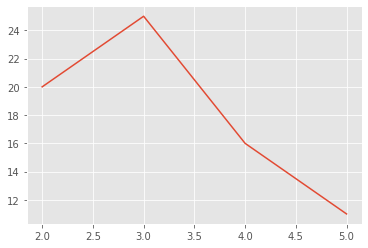

In [213]:
plt.plot([2,3,4,5],[20,25,16,11])  # data untuk x dan y ini bisa dalam bentuk list , numpy array atau tuple 
plt.show()

### Membuat Title dan label dari sumbu x dan y 

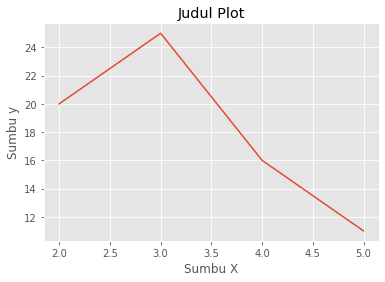

In [214]:
# kita akan nemabahkan judul didalam axes / grafik plot 
plt.plot([2,3,4,5],[20,25,16,11])  # data untuk x dan y ini bisa dalam bentuk list , numpy array atau tuple 
plt.title("Judul Plot")
plt.xlabel("Sumbu X")
plt.ylabel("Sumbu y")
plt.show()

### Menyiapkan figure dengan parameter figsize , satuan inch 

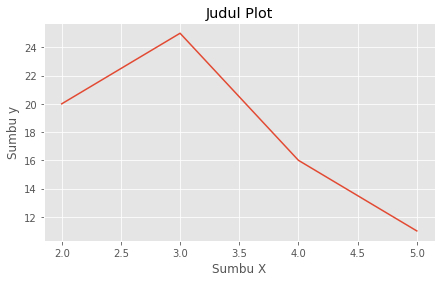

In [215]:
# mengatur ukuran dari figure dengan function figure() dengan menggunakan setingan param figsize 
plt.figure(figsize=(7,4))  # satuannya inch (x,y) 
plt.plot([2,3,4,5],[20,25,16,11])  # data untuk x dan y ini bisa dalam bentuk list , numpy array atau tuple 
plt.title("Judul Plot")
plt.xlabel("Sumbu X")
plt.ylabel("Sumbu y")
plt.show()

### Garis , Default garis tidak terputus "-" dengan menggabungkan warna 

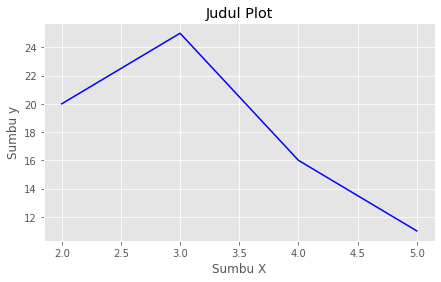

In [216]:
# secara default garis tidak terputus 
plt.figure(figsize=(7,4))  # satuannya inch (x,y) 
plt.plot([2,3,4,5],[20,25,16,11],"b-")  #  biru garis tdk terputus 
plt.title("Judul Plot")
plt.xlabel("Sumbu X")
plt.ylabel("Sumbu y")
plt.show()

### Garis , Default garis terputus "--" dengan menggabungkan warna  "g--"

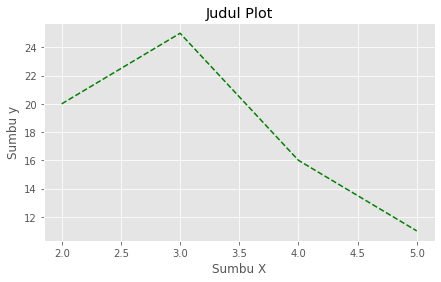

In [217]:
# secara default garis tidak terputus 
plt.figure(figsize=(7,4))  # satuannya inch (x,y) 
plt.plot([2,3,4,5],[20,25,16,11],"g--")  # terputus 
plt.title("Judul Plot")
plt.xlabel("Sumbu X")
plt.ylabel("Sumbu y")
plt.show()

### Graifik berupa Titik / Dot  ,  dengan menggabungkan warna  

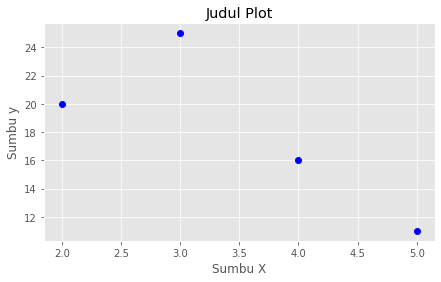

In [218]:
# selain membuat garis pada plot bisa juga membuat grafik plot berupa titik 
# secara default garis tidak terputus 
plt.figure(figsize=(7,4))  # satuannya inch (x,y) 
plt.plot([2,3,4,5],[20,25,16,11],"bo")  # warna biru dan titik  
plt.title("Judul Plot")
plt.xlabel("Sumbu X")
plt.ylabel("Sumbu y")
plt.show()

### Graifik berupa Tanda x  ,  dengan menggabungkan warna  

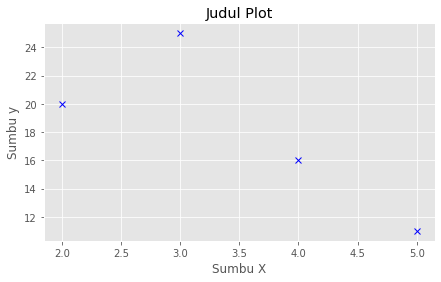

In [219]:
plt.figure(figsize=(7,4))  # satuannya inch (x,y) 
plt.plot([2,3,4,5],[20,25,16,11],"bx")  # titik x 
plt.title("Judul Plot")
plt.xlabel("Sumbu X")
plt.ylabel("Sumbu y")
plt.show()

### Graifik 2 buah bentuk dalam satu axes / grafik plot 

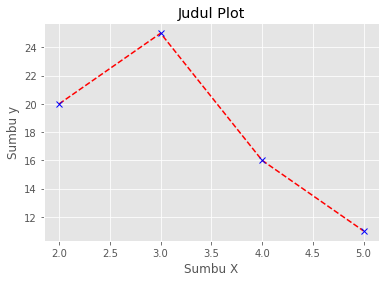

In [220]:
# megabungkan 2 buah bentuk dalam satu axes / grafik plot 
# bentuk garis dan dot
x = [2,3,4,5]
y = [20,25,16,11]
plt.plot(x,y,"r--",x,y,"bx")  # titik x 
plt.title("Judul Plot")
plt.xlabel("Sumbu X")
plt.ylabel("Sumbu y")
plt.show() 

### Graifik 2 buah bentuk dalam satu axes / grafik plot  antara titik dan x 

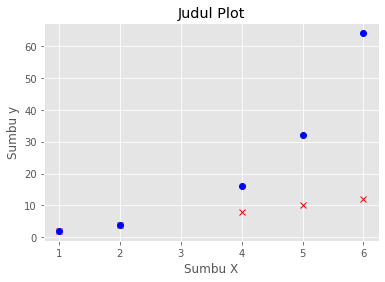

In [222]:
import numpy as np 
x = np.array([1,2,4,5,6])
y0 = 2 * x 
y1 = 2 ** x
plt.plot(x,y0,"rx",x,y1,"bo")  
plt.title("Judul Plot")
plt.xlabel("Sumbu X")
plt.ylabel("Sumbu y")
plt.show() 
# perhatikan pada titik 1 dan 2 

### Keterangan Grafik dengan legend

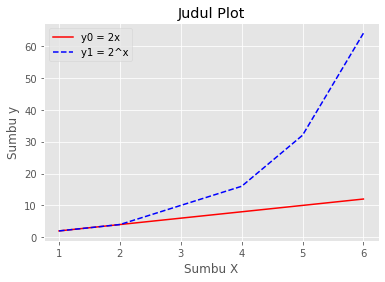

In [223]:
# untuk memudahkan dalam membaca grafik kita menambahkan func legend = memberikan keterangan grafik plt 
x = np.array([1,2,4,5,6])
y0 = 2 * x 
y1 = 2 ** x
plt.plot(x,y0,"r-",x,y1,"b--")  
plt.title("Judul Plot")
plt.xlabel("Sumbu X")
plt.ylabel("Sumbu y")
plt.legend(['y0 = 2x' , 'y1 = 2^x'], loc='best') # lokasi yang terbaik 
plt.show() 


beberapa lokasi legend = "upper right" , "upper left" , "lower left" , "right" , 
"center left" , "center right" , "lower center" , "uper center" , "center"

## Membuat Diagram Batang 

Diagram batang atau diagram bar chart itu berbentuk persegi panjang 
biasanya di pakai untuk mengambarkan perkembangan nilai dari suatu objek 
diagram batang juga menampilkan beberapa description secara vertikal atau horizontal 

function yang digunakan bisa bar() dan barh()
 
bar() untuk vertikal 
barh() untuk horizontal 

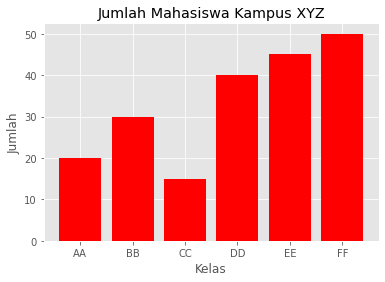

In [224]:
kelas = ['AA','BB','CC','DD','EE','FF'] 
jumlah_mahasiswa  =  [20,30,15,40,45,50]
plt.bar(kelas,jumlah_mahasiswa,color="red") 
plt.title("Jumlah Mahasiswa Kampus XYZ")
plt.xlabel("Kelas")
plt.ylabel("Jumlah") 
plt.show()

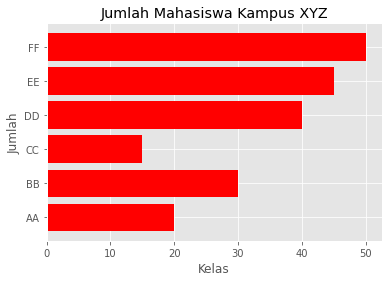

In [225]:
kelas = ['AA','BB','CC','DD','EE','FF'] 
jumlah_mahasiswa  =  [20,30,15,40,45,50]
plt.barh(kelas,jumlah_mahasiswa,color="red")  # horizontal
plt.title("Jumlah Mahasiswa Kampus XYZ")
plt.xlabel("Kelas")
plt.ylabel("Jumlah") 
plt.show()

## Membuat Diagram Pie


Diagram pie atau diagram pie chart meyajikan data menggunakan lingkaran 

Data yang ditampilkan biasanya dalam persentase data yang menginformasikan proporsi obyek suatu data terhadap keseluruhan data 

Jadi yang perlu kita ketahui itu besaran persentase data dan besaran sudut pusat sektor lingkaran 

untuk mengambarkannya menggunakan function pie()  , 

function pie() tidak mempunyai sumbu , parameter hanya satu x adalah nilai data yang diketahui pie(x) . 

Beberapa parameter  :

* autopct  -> untuk menampilkan nilai persentase 
* label  -> menampilkan keterangan label pada setiap object 
* startangle  - > memutar posisi lingkaran 

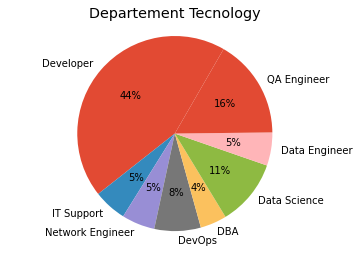

In [226]:
# plt.pie?
posisi = ["Developer","IT Support","Network Engineer","DevOps","DBA","Data Science","Data Engineer","QA Engineer"]
jumlah = [40,5,5,7,4,10,5,15]
plt.pie(jumlah,autopct="%1.0f%%",labels=posisi,startangle=60) # 60 derajat
plt.axis('equal')
plt.title("Departement Tecnology") 
plt.show()

## Membuat Histogram 

Histogram merupakan grafik yang menampilkan frekuensi data dalam bentuk diagram batang , 

sering digunakan dalam statistik atau probabilitas serta dasar dari berbagai macam distribusi statistik :  distribusi normal,  distribusi-t dll

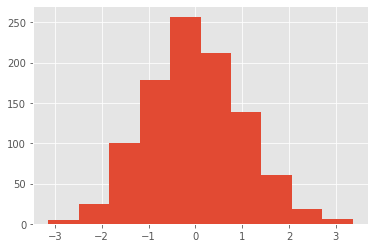

In [227]:
data = np.random.randn(1000) 
plt.hist(data,10)  # jumlah kelompok kelas data yang diinginkan 
plt.show()
# menampilkan seperti kurva distribusi normal

## Membuat Scatter Plot 

Scatter plot , scatter chart atau scatter diagram digunakan melihat sebaran data antara dua variabel 

Dengan melihat sebaran data , kita dapat mengetahui hubungan atau korelasi antara dua variabel tersebut 

Bisa menjadi korelasi positif negatif atau tidak ada korelasinya 

function scatter()  dengan scatter(x,y ) 

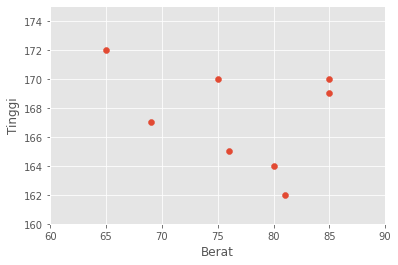

In [228]:
tinggi = [162,170,165,172,169,170,164,167]
berat = [81,85,76,65,85,75,80,69]
plt.scatter(berat,tinggi) 
plt.xlim(60,90)  # batas minimum dan maksimum berat 
plt.ylim(160,175) # batas minimum dan maksimum tinggi 
plt.xlabel("Berat") 
plt.ylabel("Tinggi")
plt.show()

## Megabungkan beberapa grafik plot , 1 figure 

dalam 1 figure kita bisa membuat beberapa grafik plot digunakan function subplot (m,n,i) 
subplot(m,n,i) 
 
 - parmeter m dan n  : sebagai dimensi dari grafik plot 
 - parameter i : sebagai urutuan dari grafik plot 

Contoh : 
- 4 Grafik secara vertikal 
    - subplot(4,1,i)  akan ada 4 grafik dalam 4 kolom 
- 4 Graifk secara horizonal 2 baris 
  - subplot(2,2,i) akan ada 2 grafik di baris 1 dan 2 grafik di bawahnya

2 Graifk horizontal
- subplot(1,2,i)  akan ada 2 grafik dalam 1 baris  


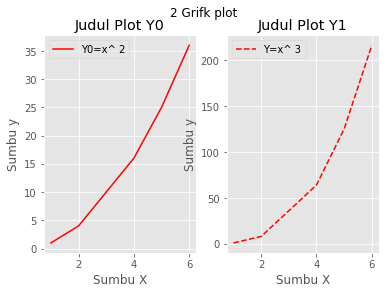

In [229]:
x = np.array([1,2,4,5,6])
y0 = x ** 2 
y1 = x ** 3 

#
plt.subplot(1,2,1)
plt.plot(x,y0,"r-")  
plt.title("Judul Plot Y0")
plt.xlabel("Sumbu X")
plt.ylabel("Sumbu y")
plt.legend(['Y0=x^ 2'])

plt.subplot(1,2,2)
plt.plot(x,y1,"r--")  
plt.title("Judul Plot Y1")
plt.xlabel("Sumbu X")
plt.ylabel("Sumbu y")
plt.legend(['Y=x^ 3'])

plt.suptitle("2 Grifk plot ")
plt.show() 

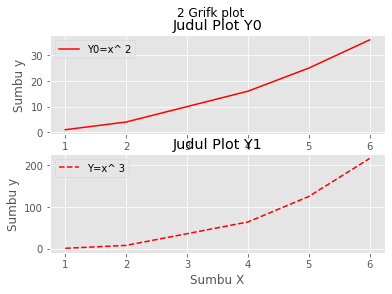

In [230]:
x = np.array([1,2,4,5,6])
y0 = x ** 2 
y1 = x ** 3 

plt.subplot(2,1,1)
plt.plot(x,y0,"r-")  
plt.title("Judul Plot Y0")
plt.xlabel("Sumbu X")
plt.ylabel("Sumbu y")
plt.legend(['Y0=x^ 2'])

plt.subplot(2,1,2)
plt.plot(x,y1,"r--")  
plt.title("Judul Plot Y1")
plt.xlabel("Sumbu X")
plt.ylabel("Sumbu y")
plt.legend(['Y=x^ 3'])

plt.suptitle("2 Grifk plot ")
plt.show() 

## Plotting in pandas
Untungnya, pandas memiliki implementasi Matplotlib bawaan yang dapat kita gunakan. Membuat plot di pandas semudah menambahkan metode .plot() ke series atau dataframe.

Documentation:

Plotting with Series
Plotting with Dataframes

## Line Pots (Series/Dataframe)
What is a line plot and why use it?

Bagan garis atau line plot adalah jenis plot yang menampilkan informasi sebagai rangkaian titik data yang disebut 'markers' yang dihubungkan oleh segmen garis lurus. Line Plot adalah tipe bagan dasar yang umum di banyak bidang. Gunakan line plot jika kalian memiliki kumpulan data continuous. Ini paling cocok untuk visualisasi data berbasis tren selama periode waktu tertentu.

Let's start with a case study:

Pada tahun 2010, Haiti mengalami bencana gempa bumi berkekuatan 7,0. Gempa tersebut menyebabkan kerusakan yang luas dan korban jiwa dan sekitar tiga juta orang terkena dampak bencana alam ini. Sebagai bagian dari upaya kemanusiaan Kanada, Pemerintah Kanada meningkatkan upayanya dalam menerima pengungsi dari Haiti. Kita dapat dengan cepat memvisualisasikan upaya ini menggunakan Line plot:

Question: Plot a line graph of immigration from Haiti using df.plot().

Pertama, kita akan mengekstrak series data untuk Haiti.

In [231]:
df_can

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Viet Nam,Asia,South-Eastern Asia,Developing regions,1191,1829,2162,3404,7583,5907,2741,...,1852,3153,2574,1784,2171,1942,1723,1731,2112,97146
Western Sahara,Africa,Northern Africa,Developing regions,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2
Yemen,Asia,Western Asia,Developing regions,1,2,1,6,0,18,7,...,161,140,122,133,128,211,160,174,217,2985
Zambia,Africa,Eastern Africa,Developing regions,11,17,11,7,16,9,15,...,91,77,71,64,60,102,69,46,59,1677


# Kembali ke data awal df_can 
<hr>

In [232]:
years = list(map(str, range(1980, 2014)))
years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

In [233]:

haiti = df_can.loc['Haiti',years] # passing in years 1980 - 2013 to exclude the 'total' column
haiti.head()

1980    1666
1981    3692
1982    3498
1983    2860
1984    1418
Name: Haiti, dtype: object

In [234]:
haiti.index

Index(['1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988',
       '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013'],
      dtype='object')

In [235]:
haiti.values

array([1666, 3692, 3498, 2860, 1418, 1321, 1753, 2132, 1829, 2377, 2379,
       2829, 2399, 3655, 2100, 2014, 1955, 1645, 1295, 1439, 1631, 2433,
       2174, 1930, 1652, 1682, 1619, 1598, 2491, 2080, 4744, 6503, 5868,
       4152], dtype=object)

In [ ]:
print(haiti)

1980    1666
1981    3692
1982    3498
1983    2860
1984    1418
1985    1321
1986    1753
1987    2132
1988    1829
1989    2377
1990    2379
1991    2829
1992    2399
1993    3655
1994    2100
1995    2014
1996    1955
1997    1645
1998    1295
1999    1439
2000    1631
2001    2433
2002    2174
2003    1930
2004    1652
2005    1682
2006    1619
2007    1598
2008    2491
2009    2080
2010    4744
2011    6503
2012    5868
2013    4152
Name: Haiti, dtype: object


Selanjutnya, kita akan memplot plot garis dengan menambahkan .plot() ke haiti dataframe.



<AxesSubplot:>

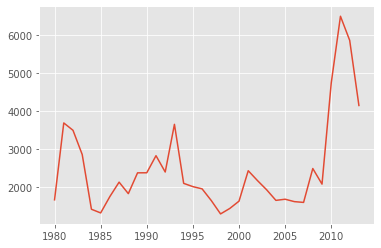

In [236]:
haiti.plot()

pandas secara otomatis mengisi sumbu x dengan nilai indeks (years), dan sumbu y dengan nilai kolom (population). Namun, perhatikan bagaimana tahun tidak ditampilkan karena merupakan tipe string. Oleh karena itu, mari kita ubah jenis nilai indeks menjadi integer untuk plot.

Juga, mari beri label sumbu x dan y menggunakan plt.title(), plt.ylabel(), dan plt.xlabel() sebagai berikut:

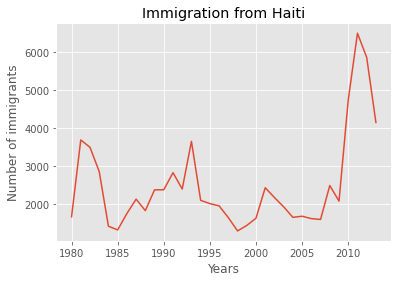

In [237]:
haiti.index = haiti.index.map(int) # let's change the index values of Haiti to type integer for plotting
haiti.plot(kind='line')

plt.title('Immigration from Haiti')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')

plt.show() # need this line to show the updates made to the figure

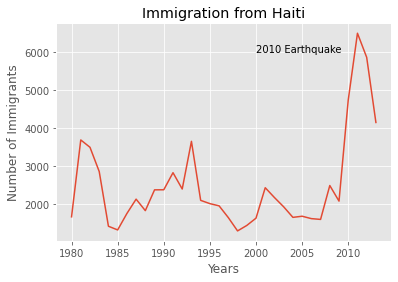

In [ ]:
haiti.plot(kind='line')

plt.title('Immigration from Haiti')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

# annotate the 2010 Earthquake. 
# syntax: plt.text(x, y, label)
plt.text(2000, 6000, '2010 Earthquake') # see note below

plt.show() 

Hanya dengan beberapa baris kode, kalian dapat dengan cepat mengidentifikasi dan memvisualisasikan lonjakan imigrasi!

Catatan singkat tentang nilai x dan y di plt.text(x, y, label):

Karena sumbu x (tahun) adalah tipe 'bilangan bulat', kami menetapkan x sebagai tahun. 

Sumbu y (jumlah pendatang) bertipe 'bilangan bulat', jadi kita tinggal menentukan nilai y = 6000.

    plt.text(2000, 6000, '2010 Earthquake') # years stored as type int

Jika tahun disimpan sebagai tipe 'string', kita perlu menentukan x sebagai posisi indeks tahun tersebut. Misalnya indeks ke-20 adalah tahun 2000 karena merupakan tahun ke-20 dengan tahun dasar 1980.

    plt.text(20, 6000, '2010 Earthquake') # years stored as type int


We will cover advanced annotation methods in later session.


Kita dapat dengan mudah menambahkan lebih banyak negara ke plot garis untuk membuat perbandingan imigrasi dari berbagai negara.

Pertanyaan: Mari kita bandingkan jumlah imigran dari India dan China dari tahun 1980 hingga 2013.

Step 1: Dapatkan kumpulan data untuk China dan India, dan tampilkan dataframe.



In [238]:
China_India = df_can.loc[['China', 'India'], years]
China_India

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,...,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,...,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087


Step 2: Plotting grafiknya. Kita akan secara eksplisit membuat line plot dengan meneruskan parameter kind ke plot().

<AxesSubplot:>

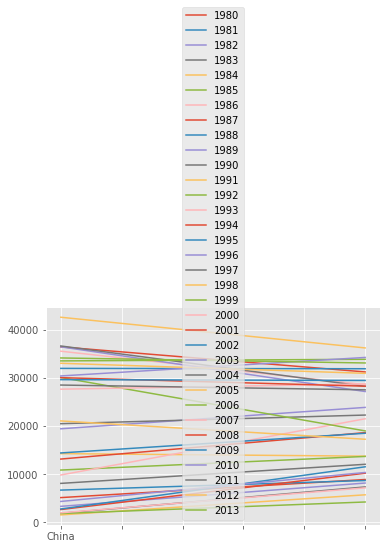

In [239]:
### type your answer here
China_India.plot(kind='line')

Kelihatannya tidak benar...

Ingatlah bahwa pandas memplot indeks pada sumbu x dan kolom sebagai garis individu pada sumbu y. Karena df_CI adalah dataframe dengan country sebagai indeks dan years sebagai kolom, pertama-tama kita harus mengubah susunan kerangka data menggunakan metode transpose() untuk menukar baris dan kolom.

In [240]:
df_CI = China_India.transpose()
df_CI.head()

,China,India
1980,5123,8880
1981,6682,8670
1982,3308,8147
1983,1863,7338
1984,1527,5704


pandas secara otomatis akan membuat grafik kedua negara pada grafik yang sama. Lanjutkan dan plot kerangka data baru yang sudah ditranspose. Pastikan untuk menambahkan judul ke plot dan memberi label pada sumbu.

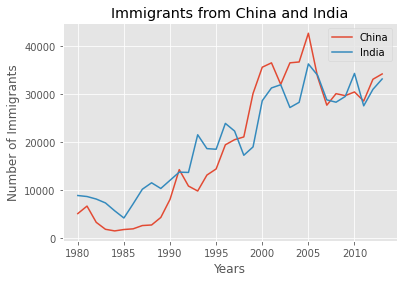

In [241]:
### 

df_CI.plot(kind='line')
plt.title('Immigrants from China and India')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')
plt.show()

Dari plot di atas, kita dapat mengamati bahwa China dan India memiliki tren imigrasi yang sangat mirip selama bertahun-tahun.

Line plot adalah alat praktis untuk menampilkan beberapa variabel dependen terhadap satu variabel independen. Namun, disarankan tidak lebih dari 5-10 garis pada satu grafik; lebih dari itu dan menjadi sulit untuk ditafsirkan.

Question: Compare the trend of top 5 countries that contributed the most to immigration to Canada.

In [242]:
### 

df_can.sort_values(by='Total', ascending=False, axis=0, inplace=True)
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600


In [243]:
df_top5 = df_can.head(5)
df_top5.head(6)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600


In [244]:
df_top5 = df_top5[years].transpose() 
df_top5

,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668
1985,4211,1816,9564,3150,514
1986,7150,1960,9470,4166,691
1987,10189,2643,21337,7360,1072
1988,11522,2758,27359,8639,1334
1989,10343,4323,23795,11865,2261


In [245]:
df_top5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34 entries, 1980 to 2013
Data columns (total 5 columns):
 #   Column                                                Non-Null Count  Dtype
---  ------                                                --------------  -----
 0   India                                                 34 non-null     Int64
 1   China                                                 34 non-null     Int64
 2   United Kingdom of Great Britain and Northern Ireland  34 non-null     Int64
 3   Philippines                                           34 non-null     Int64
 4   Pakistan                                              34 non-null     Int64
dtypes: Int64(5)
memory usage: 1.8+ KB


In [246]:
df_top5.index

Index(['1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988',
       '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013'],
      dtype='object')

In [247]:
df_top5.index = df_top5.index.map(int)
df_top5.index

Int64Index([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
            1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
            2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
            2013],
           dtype='int64')

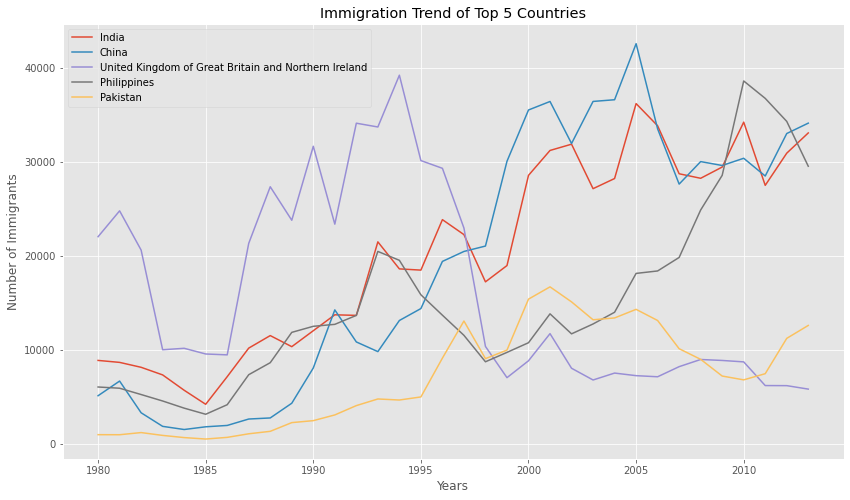

In [248]:

df_top5.plot(kind='line', figsize=(14, 8))
plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

## Area Plots
Di bagian terakhir, kita membuat plot garis yang memvisualisasikan 5 negara teratas yang menyumbang paling banyak imigran ke Kanada dari 1980 hingga 2013. 

Dengan sedikit modifikasi pada kode, kita dapat memvisualisasikan plot ini sebagai cumulative plot, juga dikenal sebagai Stacked Line Plot atau Area plot.

In [249]:
df_can.sort_values(['Total'], ascending=False, axis=0, inplace=True)

# get the top 5 entries
df_top5 = df_can.head()

# transpose the dataframe
df_top5 = df_top5[years].transpose() 

df_top5.head()

,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


Area plots ter-stacked secara default. Dan untuk menghasilkan stacked area plot, 

setiap kolom harus berupa semua nilai positif atau semua nilai negatif (nilai NaN akan ditetapkan secara default ke 0). 

Untuk menghasilkan unstacked plot, berikan stacked=False.


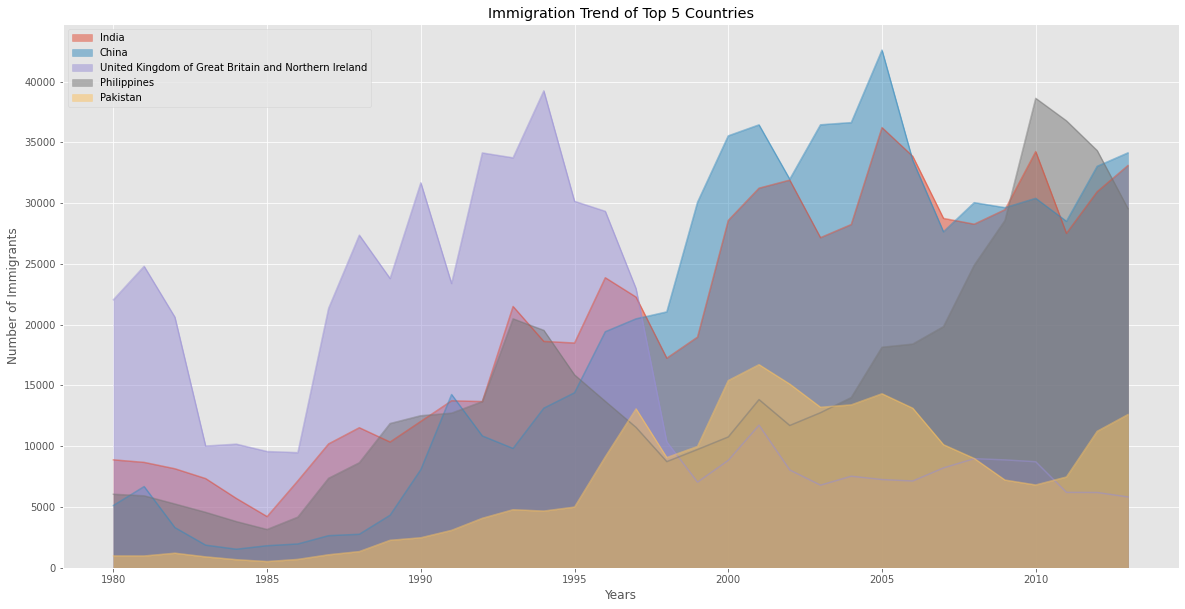

In [250]:
df_top5.index = df_top5.index.map(int) # let's change the index values of df_top5 to type integer for plotting

df_top5.plot(kind='area', 
             stacked=False,
             figsize=(20, 10), # pass a tuple (x, y) size
             )

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

Plot unstacked  memiliki transparansi default (alpha value)) sebesar 0,5. Kita dapat mengubah nilai ini dengan memasukkan parameter alpha .

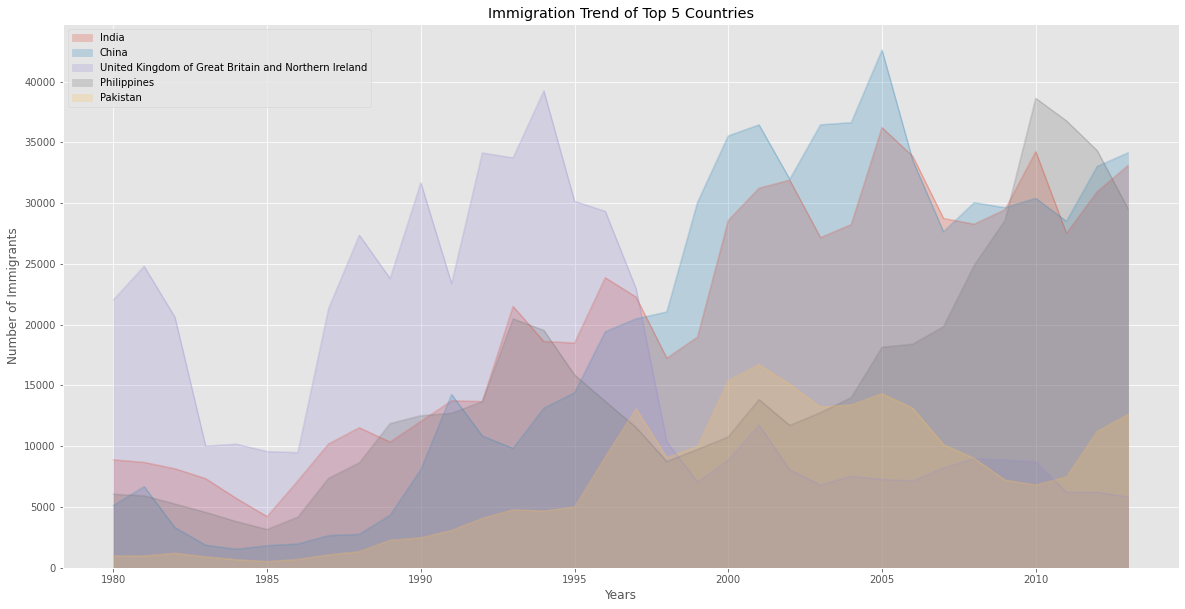

In [251]:
df_top5.plot(kind='area', 
             alpha=0.25, # 0-1, default value a= 0.5
             stacked=False,
             figsize=(20, 10),
            )

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()


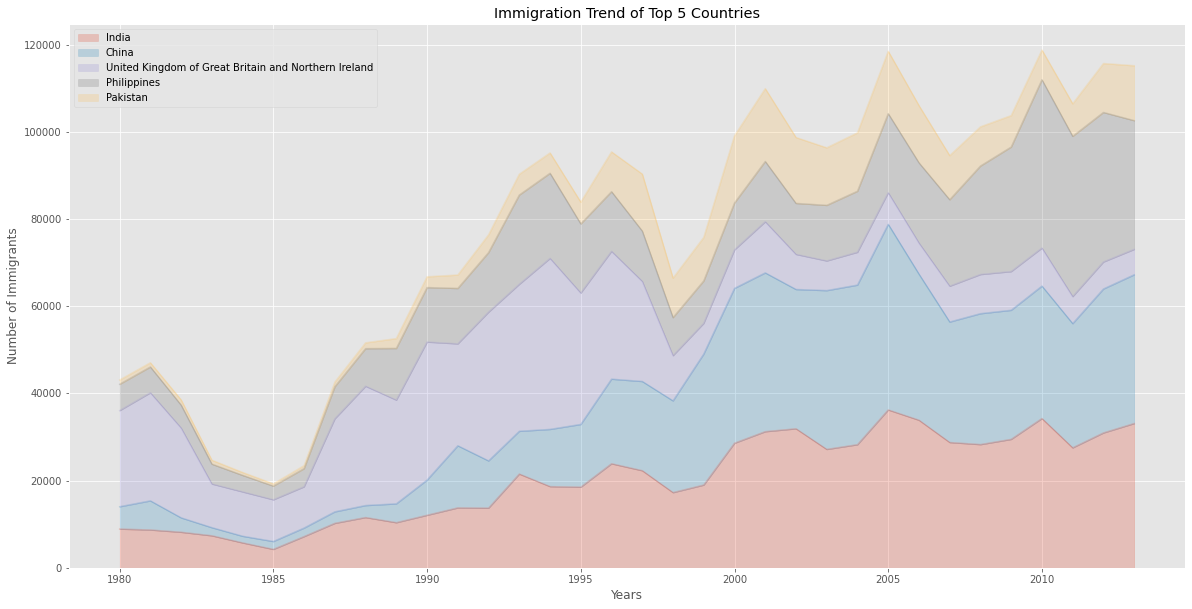

In [252]:
df_top5.plot(kind='area', 
             alpha=0.25, # 0-1, default value a= 0.5
             stacked=True,
             figsize=(20, 10),
            )

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

## Two types of plotting
Ada dua gaya / pilihan membuat plot dengman matplotlib. Membuat plot menggunakan Artist layer dan membuat plot menggunakan scripting layer.

**Option 1: Scripting layer (procedural method) - using matplotlib.pyplot as 'plt' **

Kita dapat menggunakan plt yaitu matmplotlib.pyplot dan menambahkan lebih banyak elemen dengan memanggil metode yang berbeda secara prosedural; 

misalnya, plt.title(...) untuk menambahkan judul atau plt.xlabel(...) untuk menambahkan label ke sumbu x.

**Option 2: Artist layer (Object oriented method) - using an Axes instance from Matplotlib (preferred) **

Kita dapat menggunakan instance Axes dari plot kita saat ini dan menyimpannya dalam variabel (misalnya ax).

Kita dapat menambahkan lebih banyak elemen dengan memanggil metode dengan sedikit perubahan dalam sintaks (dengan menambahkan "set_" ke metode sebelumnya). 

Misalnya, gunakan ax.set_title() sebagai ganti plt.title() untuk menambahkan judul, atau ax.set_xlabel() sebagai ganti plt.xlabel() untuk menambahkan label ke sumbu x.

Opsi ini terkadang lebih transparan dan fleksibel untuk digunakan pada plot tingkat lanjut (khususnya jika memiliki banyak plot, seperti yang akan kita lihat nanti).

Di sesi ini, kita akan tetap menggunakan scripting layer, kecuali untuk beberapa visualisasi lanjutan di mana kita perlu menggunakan artist layer untuk memanipulasi aspek lanjutan dari plot.

Text(0.5, 0, 'Years')

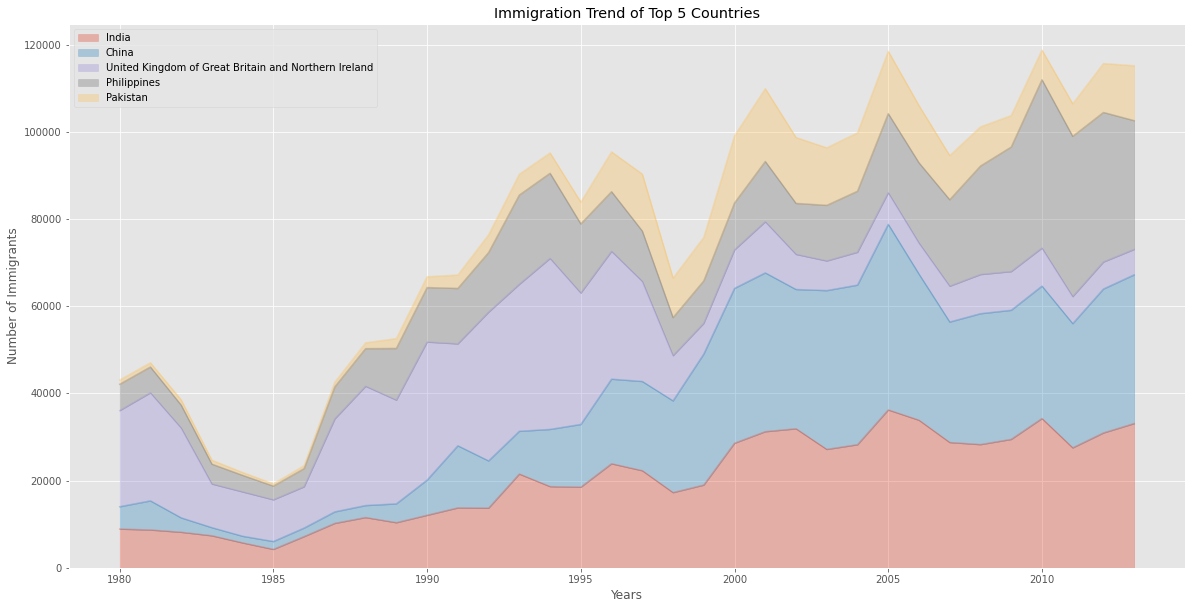

In [253]:
# option 2: preferred option with more flexibility
ax = df_top5.plot(kind='area', alpha=0.35, figsize=(20, 10))

ax.set_title('Immigration Trend of Top 5 Countries')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')

Pertanyaan: Gunakan lapisan skrip untuk membuat plot area bertumpuk dari 5 negara yang berkontribusi paling sedikit terhadap imigrasi ke Kanada dari tahun 1980 hingga 2013. Gunakan nilai transparansi 0,45.

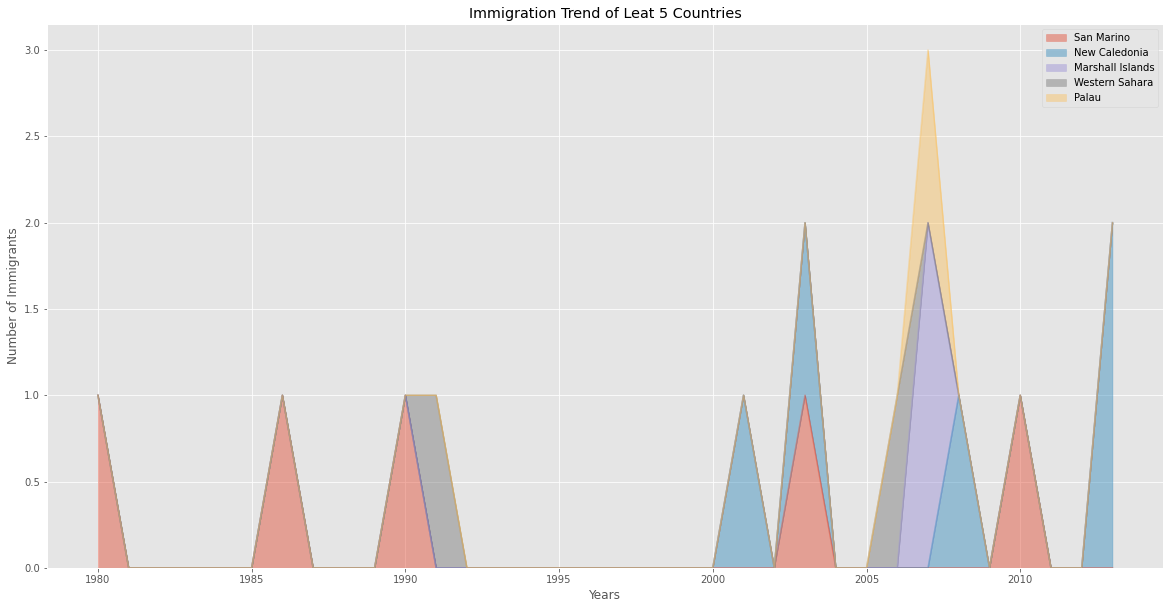

In [254]:
### type your answer here
df_least5 = df_can.tail(5)
df_least5 = df_least5[years].transpose() 

df_least5.plot(kind='area', 
             alpha=0.45, # 0-1, default value a= 0.5
             stacked=True,
             figsize=(20, 10),
            )

plt.title('Immigration Trend of Leat 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

Pertanyaan: Gunakan layer artis untuk membuat plot area yang tidak ditumpuk dari 5 negara yang berkontribusi paling sedikit terhadap imigrasi ke Kanada dari tahun 1980 hingga 2013. Gunakan nilai transparansi 0,55.

Text(0.5, 0, 'Years')

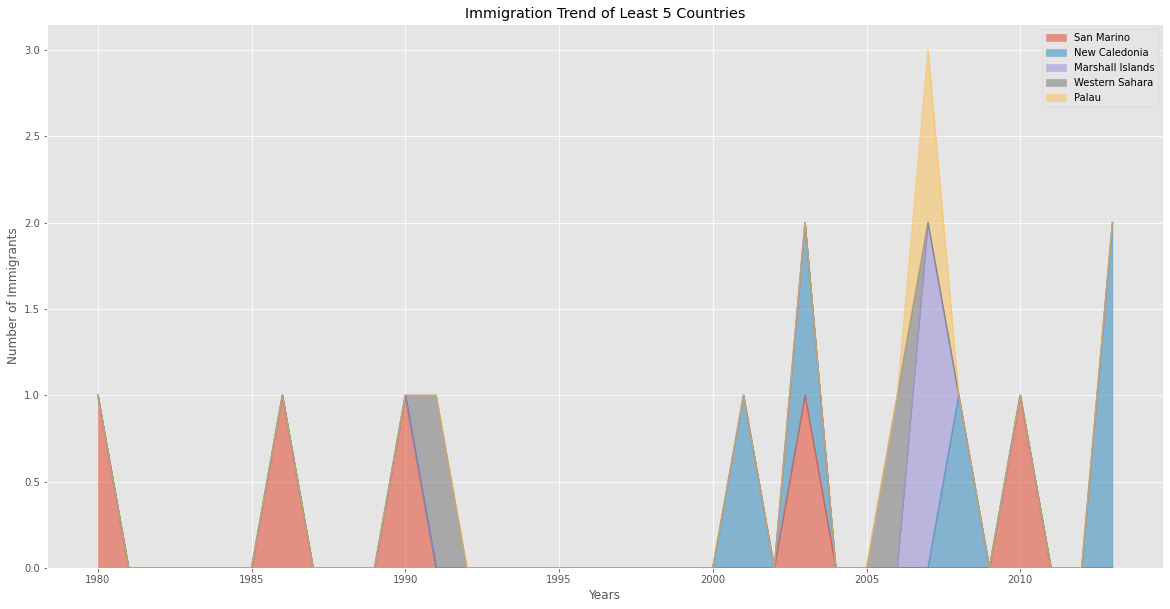

In [255]:
### type your answer here
ax = df_least5.plot(kind='area', alpha=0.55, figsize=(20, 10))

ax.set_title('Immigration Trend of Least 5 Countries')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')

## Histograms
Histogram adalah cara untuk merepresentasikan distribusi frekuensi dari dataset numerik. 

Cara kerjanya adalah mempartisi sumbu x menjadi beberapa bin, 

menetapkan setiap titik data dalam kumpulan data kita ke sebuah bin, 

dan kemudian menghitung jumlah titik data yang telah ditetapkan ke setiap bin. 

Jadi sumbu y adalah frekuensi atau banyaknya titik data pada setiap bin. 

Note bahwa kita dapat mengubah ukuran bin dan biasanya kita perlu menyesuaikannya agar distribusinya ditampilkan dengan baik.

Pertanyaan: Bagaimana distribusi frekuensi jumlah (penduduk) imigran baru dari berbagai negara ke Kanada pada tahun 2013?

Sebelum kita melanjutkan dengan membuat plot histogram, 

pertama-tama mari kita periksa data yang akan dibagi menjadi beberapa interval. 

Untuk melakukan ini, kami akan menggunakan metode Numpy's histrogram untuk mendapatkan range bin dan jumlah frekuensi sebagai berikut:

In [256]:
# let's quickly view the 2013 data
df_can['2013'].head()

India                                                   33087
China                                                   34129
United Kingdom of Great Britain and Northern Ireland     5827
Philippines                                             29544
Pakistan                                                12603
Name: 2013, dtype: Int64

In [257]:

# np.histogram returns 2 values
count, bin_edges = np.histogram(df_can['2013'])

print(count) # frequency count
print(bin_edges) # bin ranges, default = 10 bins

[178  11   1   2   0   0   0   0   1   2]
[0.0 3412.9 6825.8 10238.7 13651.6 17064.5 20477.4 23890.3 27303.2
 30716.100000000002 34129.0]


Secara default, metode histrogram memecah dataset menjadi 10 bin. Gambar di bawah ini merangkum kisaran bin dan distribusi frekuensi imigrasi di tahun 2013. Dapat kita lihat di tahun 2013:

178 negara menyumbang antara 0 hingga 3412,9 imigran
11 negara menyumbang antara 3412,9 hingga 6825,8 imigran
1 negara menyumbang antara 6285,8 hingga 10238,7 imigran, dan seterusnya..
Kita dapat dengan mudah membuat grafik distribusi ini dengan menyimpan kind=hist ke plot().

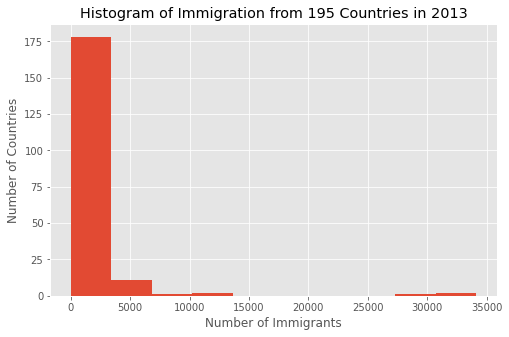

In [258]:
df_can['2013'].plot(kind='hist', figsize=(8, 5))

plt.title('Histogram of Immigration from 195 Countries in 2013') # add a title to the histogram
plt.ylabel('Number of Countries') # add y-label
plt.xlabel('Number of Immigrants') # add x-label

plt.show()

Pada plot di atas, sumbu x menunjukkan kisaran populasi imigran dalam interval 3412,9. Sumbu y mewakili jumlah negara yang berkontribusi pada populasi tersebut.

Perhatikan bahwa label sumbu x tidak cocok dengan ukuran bin. Hal ini dapat diperbaiki dengan memasukkan  xticks yang berisi daftar ukuran bin, sebagai berikut:



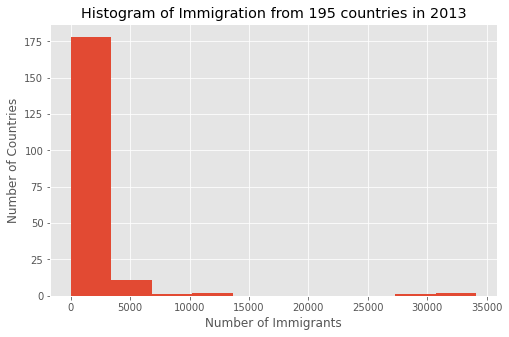

In [259]:
# 'bin_edges' is a list of bin intervals
count, bin_edges = np.histogram(df_can['2013'])

df_can['2013'].plot(kind='hist', figsize=(8, 5))

plt.title('Histogram of Immigration from 195 countries in 2013') # add a title to the histogram
plt.ylabel('Number of Countries') # add y-label
plt.xlabel('Number of Immigrants') # add x-label

plt.show()

Side Note: Kita bisa menggunakan df_can['2013'].plot.hist(), sebagai gantinya. Faktanya, sepanjang sesi ini, menggunakan some_data.plot(kind='type_plot', ...) sama dengan some_data.plot.type_plot(...). Artinya, meneruskan tipe plot sebagai argumen atau metode akan berperilaku sama.

Lihat dokumentasi pandas untuk info selengkapnya http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.plot.html.

Kita juga dapat memplot beberapa histogram pada plot yang sama. Sebagai contoh, mari kita coba menjawab pertanyaan-pertanyaan berikut ini dengan menggunakan histogram.

Pertanyaan: Bagaimana distribusi imigrasi untuk Denmark, Norwegia, dan Swedia untuk tahun 1980 - 2013?

In [ ]:
# let's quickly view the dataset 
df_can.loc[['Denmark', 'Norway', 'Sweden'], years]

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Denmark,272,293,299,106,93,73,93,109,129,129,...,89,62,101,97,108,81,92,93,94,81
Norway,116,77,106,51,31,54,56,80,73,76,...,73,57,53,73,66,75,46,49,53,59
Sweden,281,308,222,176,128,158,187,198,171,182,...,129,205,139,193,165,167,159,134,140,140


<AxesSubplot:ylabel='Frequency'>

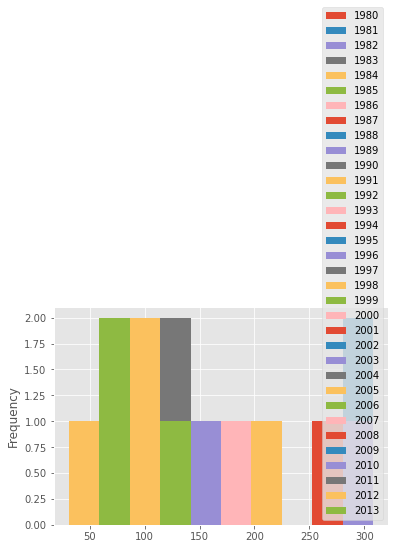

In [260]:
# generate histogram
df_can.loc[['Denmark', 'Norway', 'Sweden'], years].plot.hist()

Kelihatannya tidak benar!

Jangan khawatir, kita akan sering menjumpai situasi seperti ini saat membuat plot. Solusinya sering kali terletak pada bagaimana kumpulan data yang mendasarinya disusun.

Alih-alih memplot distribusi frekuensi populasi populasi untuk 3 negara, pandas malah memplot distribusi frekuensi untuk years.

Hal ini dapat dengan mudah diperbaiki dengan terlebih dahulu mengubah urutan dataset, dan kemudian memplot seperti yang ditunjukkan di bawah ini.

In [261]:
# transpose dataframe
df_t = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].T
df_t.head()

,Denmark,Norway,Sweden
1980,272,116,281
1981,293,77,308
1982,299,106,222
1983,106,51,176
1984,93,31,128


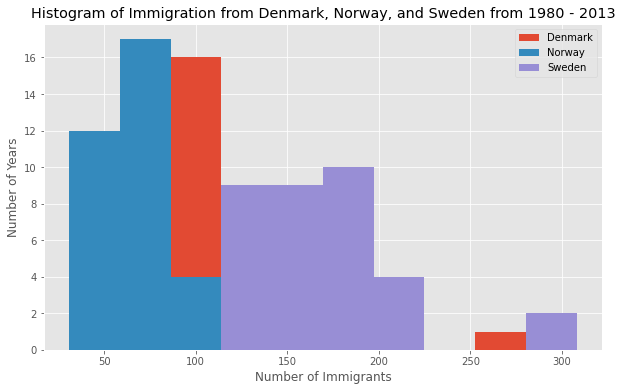

In [262]:
# generate histogram
df_t.plot(kind='hist', figsize=(10, 6))

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

Mari buat beberapa modifikasi untuk meningkatkan impact dan estetika dari plot sebelumnya:

tingkatkan ukuran bin menjadi 15 dengan meneruskan parameter bins
atur transparansi menjadi 60% dengan meneruskan parameter alfa
beri label sumbu x dengan melewatkan parameter label-x
ubah warna plot dengan memasukkan parameter warna


In [ ]:
df_t.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34 entries, 1980 to 2013
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Denmark  34 non-null     int64
 1   Norway   34 non-null     int64
 2   Sweden   34 non-null     int64
dtypes: int64(3)
memory usage: 1.1+ KB


In [263]:
count, bin_edges = np.histogram(df_t, 15)
print(count)
print(bin_edges)

[ 5 13 21 14  9 10  5  9  7  3  1  0  0  2  3]
[31.0 49.46666666666667 67.93333333333334 86.39999999999999
 104.86666666666666 123.33333333333333 141.79999999999998
 160.26666666666665 178.73333333333332 197.2 215.66666666666666
 234.13333333333333 252.59999999999997 271.0666666666666 289.5333333333333
 308.0]


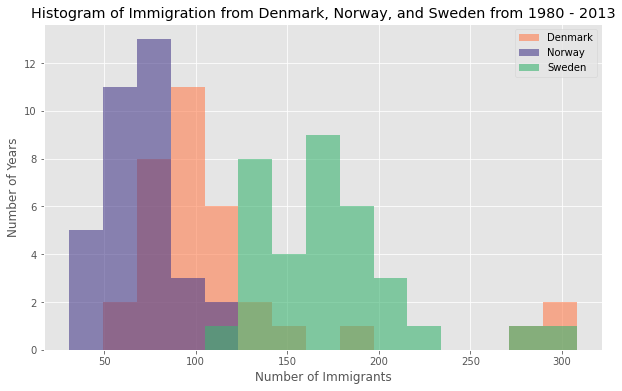

In [264]:
# let's get the x-tick values

# un-stacked histogram
df_t.plot(kind ='hist', 
          figsize=(10, 6),
          bins=15,
          alpha=0.6,
         
          color=['coral', 'darkslateblue', 'mediumseagreen']
         )

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

Tip: For a full listing of colors available in Matplotlib, run the following code in your python shell:



In [265]:
import matplotlib
for name, hex in matplotlib.colors.cnames.items():
    print(name, hex)

aliceblue #F0F8FF
antiquewhite #FAEBD7
aqua #00FFFF
aquamarine #7FFFD4
azure #F0FFFF
beige #F5F5DC
bisque #FFE4C4
black #000000
blanchedalmond #FFEBCD
blue #0000FF
blueviolet #8A2BE2
brown #A52A2A
burlywood #DEB887
cadetblue #5F9EA0
chartreuse #7FFF00
chocolate #D2691E
coral #FF7F50
cornflowerblue #6495ED
cornsilk #FFF8DC
crimson #DC143C
cyan #00FFFF
darkblue #00008B
darkcyan #008B8B
darkgoldenrod #B8860B
darkgray #A9A9A9
darkgreen #006400
darkgrey #A9A9A9
darkkhaki #BDB76B
darkmagenta #8B008B
darkolivegreen #556B2F
darkorange #FF8C00
darkorchid #9932CC
darkred #8B0000
darksalmon #E9967A
darkseagreen #8FBC8F
darkslateblue #483D8B
darkslategray #2F4F4F
darkslategrey #2F4F4F
darkturquoise #00CED1
darkviolet #9400D3
deeppink #FF1493
deepskyblue #00BFFF
dimgray #696969
dimgrey #696969
dodgerblue #1E90FF
firebrick #B22222
floralwhite #FFFAF0
forestgreen #228B22
fuchsia #FF00FF
gainsboro #DCDCDC
ghostwhite #F8F8FF
gold #FFD700
goldenrod #DAA520
gray #808080
green #008000
greenyellow #ADFF2F


Jika kita tidak ingin plot saling tumpang tindih, kita dapat menumpuknya menggunakan parameter stacked. Mari kita juga menyesuaikan label sumbu x min dan maks untuk menghilangkan celah ekstra di tepi plot. Kita bisa pass tuple (min, max) menggunakan parameter xlim , seperti yang ditunjukkan di bawah ini.

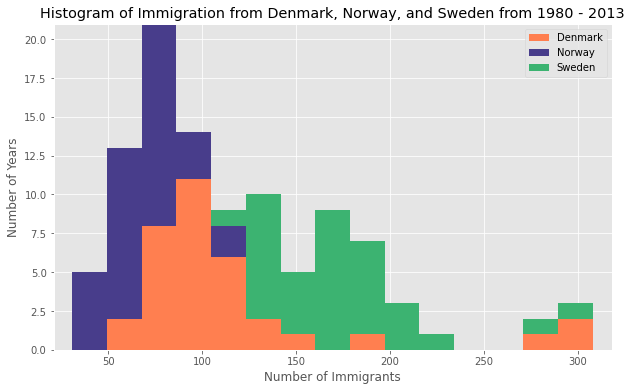

In [266]:
count, bin_edges = np.histogram(df_t, 15)
xmin = bin_edges[0] - 10   #  first bin value is 31.0, adding buffer of 10 for aesthetic purposes 
xmax = bin_edges[-1] + 10  #  last bin value is 308.0, adding buffer of 10 for aesthetic purposes

# stacked Histogram
df_t.plot(kind='hist',
          figsize=(10, 6), 
          bins=15,
         
          color=['coral', 'darkslateblue', 'mediumseagreen'],
          stacked=True,
          xlim=(xmin, xmax)
         )

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants') 

plt.show()


Pertanyaan: Gunakan lapisan skrip untuk menampilkan distribusi imigrasi untuk Yunani, Albania, dan Bulgaria selama tahun 1980 - 2013? Gunakan plot yang tumpang tindih dengan 15 bin dan nilai transparansi 0,35.

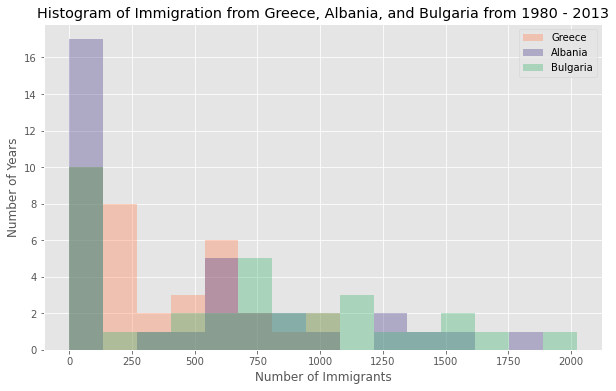

In [267]:
### type your answer here
df_cof = df_can.loc[['Greece', 'Albania', 'Bulgaria'], years]
df_cof = df_cof.transpose() 

count, bin_edges = np.histogram(df_cof, 15)
df_cof.plot(kind ='hist',
            figsize=(10, 6),
            bins=15,
            alpha=0.35,
          
            color=['coral', 'darkslateblue', 'mediumseagreen']
            )

plt.title('Histogram of Immigration from Greece, Albania, and Bulgaria from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')
plt.show()

# Bar Charts (Dataframe)
Plot batang/bar plot adalah cara merepresentasikan data di mana panjang batang merepresentasikan besaran / ukuran fitur / variabel. Grafik batang biasanya mewakili variabel numerik dan kategori yang dikelompokkan dalam interval.

Untuk membuat plot batang, kita dapat passing salah satu dari dua argumen melalui parameter kind di plot():

kind=bar creates a vertical bar plot
kind=barh creates a horizontal bar plot
Vertical bar plot

Dalam vertical bar graphs, sumbu x digunakan untuk labelling, dan panjang batang pada sumbu y sesuai dengan besaran variabel yang diukur. vertical bar graphs sangat berguna dalam menganalisis data deret waktu. Salah satu kelemahannya adalah kekurangan ruang untuk pelabelan teks di kaki setiap batang.

Let's start off by analyzing the effect of Iceland's Financial Crisis:

Krisis Keuangan Islandia 2008 - 2011 adalah peristiwa ekonomi dan politik utama di Islandia. Dibandingkan dengan peristiwa ekonominya, keruntuhan perbankan sistemik Islandia adalah yang terbesar dialami oleh negara mana pun dalam sejarah ekonomi. Krisis tersebut menyebabkan depresi ekonomi yang parah pada tahun 2008 - 2011 dan kerusuhan politik yang signifikan

Pertanyaan: Mari kita bandingkan jumlah imigran Islandia (negara = 'Islandia') ke Kanada dari tahun 1980 hingga 2013.

In [268]:
# step 1: get the data
df_iceland = df_can.loc['Iceland', years]
df_iceland.head()

1980    17
1981    33
1982    10
1983     9
1984    13
Name: Iceland, dtype: object

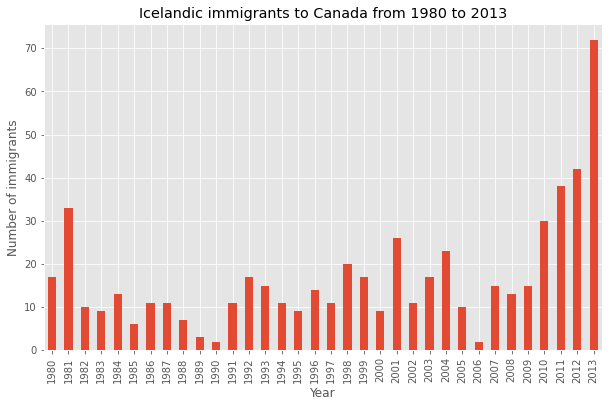

In [269]:
# step 2: plot data
df_iceland.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Year') # add to x-label to the plot
plt.ylabel('Number of immigrants') # add y-label to the plot
plt.title('Icelandic immigrants to Canada from 1980 to 2013') # add title to the plot

plt.show()

Plot di atas menunjukkan jumlah total imigran yang dikelompokkan setiap tahun. Kita bisa melihat dengan jelas dampak dari krisis keuangan; jumlah imigran ke Kanada mulai meningkat pesat setelah 2008.

Mari kita beri anotasi pada plot menggunakan metode annotate pada scripting layer atau antarmuka pyplot. Kita akan passing parameter berikut:

- s: str, teks anotasi.
- xy: Tuple yang menentukan titik (x,y) untuk diberi anotasi (dalam hal ini, titik akhir panah).
- xytext: Tuple yang menentukan titik (x,y) untuk menempatkan teks (dalam hal ini, titik awal panah).
- xycoords: Sistem koordinat yang diberikan xy di - 'data' menggunakan sistem koordinat objek yang dianotasi (default).
- arrowprops: Mengambil dict properti untuk menggambar panah:
- arrowstyle: Menentukan gaya panah, '->' adalah panah standar.
- connectionstyle: Menentukan jenis koneksi. arc3 adalah garis lurus.
- color: Menentukan warna arror.
- lw: Menentukan lebar garis.

Mari kita juga memberi anotasi pada teks untuk berada di atas panah. Kita akan menambahkan parameter tambahan berikut:

- rotasi: sudut rotasi teks dalam derajat (berlawanan arah jarum jam)
- va: perataan vertikal teks ['center' | 'top' | 'bottom' | 'baseline']
- ha: perataan horizontal teks ['center' | 'right' | 'left']

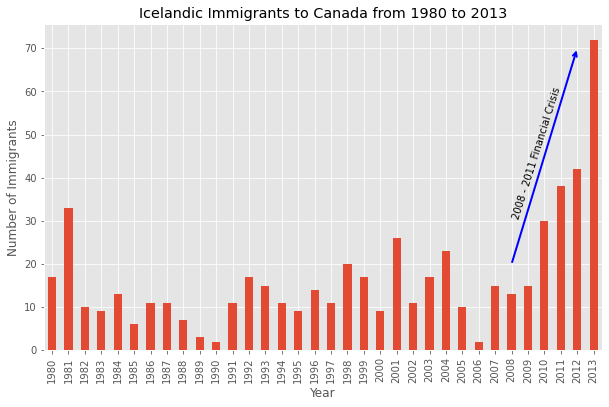

In [270]:
df_iceland.plot(kind='bar', figsize=(10, 6), rot=90) 

plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')

# Annotate arrow
plt.annotate('',                      # s: str. will leave it blank for no text
             xy=(32, 70),             # place head of the arrow at point (year 2012 , pop 70)
             xytext=(28, 20),         # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data',         # will use the coordinate system of the object being annotated 
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
            )

# Annotate Text
plt.annotate('2008 - 2011 Financial Crisis', # text to display
             xy=(28, 30),                    # start the text at at point (year 2008 , pop 30)
             rotation=72.5,                  # based on trial and error to match the arrow
             va='bottom',                    # want the text to be vertically 'bottom' aligned
             ha='left',                      # want the text to be horizontally 'left' algned.
            )

plt.show()

Horizontal Bar Plot

Terkadang lebih praktis untuk merepresentasikan data secara horizontal, terutama jika kita membutuhkan lebih banyak ruang untuk memberi label pada bar plot. Dalam horizontal bar graphs, sumbu y digunakan untuk pelabelan, dan panjang batang pada sumbu x sesuai dengan besaran variabel yang diukur. Seperti yang akan kita lihat, ada lebih banyak ruang pada sumbu y untuk memberi label variabel kategoris.

Pertanyaan: Dengan menggunakan lapisan skrip dan kumpulan data df_can, buat plot batang horizontal yang menunjukkan jumlah total imigran ke Kanada dari 15 negara teratas, untuk periode 1980 - 2013. Beri label setiap negara dengan jumlah total imigran.

Step 1: Dapatkan data yang berkaitan dengan 15 negara teratas.

In [271]:

df_can.sort_values(by='Total', ascending=True, inplace=True)
df_top15 = df_can['Total'].head(15)
df_top15

Palau                     1
Western Sahara            2
Marshall Islands          2
New Caledonia             5
San Marino                5
American Samoa            6
Tuvalu                    8
Sao Tome and Principe    10
Vanuatu                  11
Kiribati                 15
Andorra                  15
Nauru                    18
Canada                   20
Monaco                   29
Maldives                 30
Name: Total, dtype: Int64

Step 2: Plot data:

Gunakan kind='barh' untuk membuat diagram batang dengan batang horizontal.
Pastikan untuk memilih ukuran plot yang baik dan memberi label pada kapak Anda dan memberi judul plot.
Ulangi negara dan beri anotasi pada populasi imigran menggunakan fungsi anotasi dari antarmuka skrip.

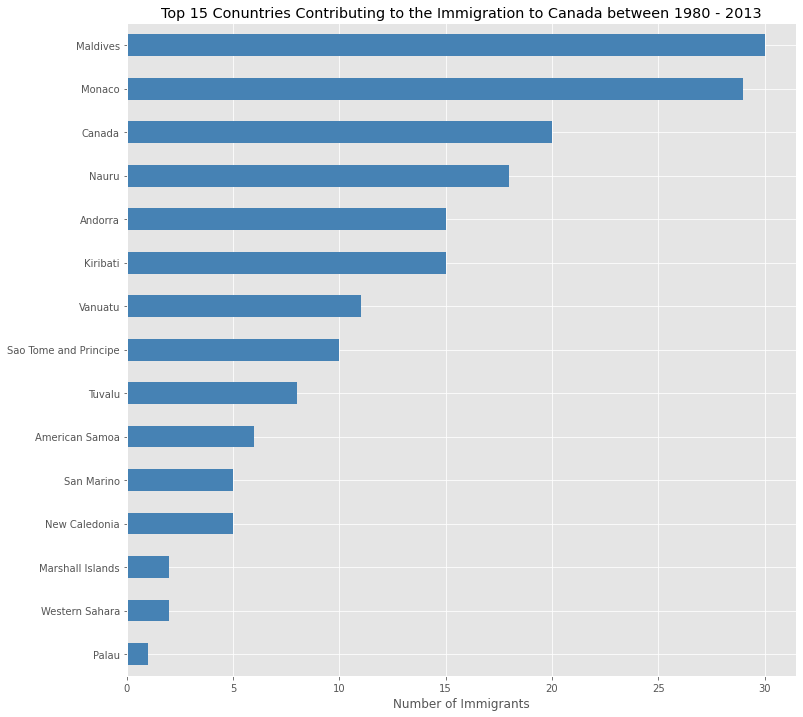

In [272]:
### type your answer here

df_top15.plot(kind='barh', figsize=(12, 12), color='steelblue')
plt.xlabel('Number of Immigrants')
plt.title('Top 15 Conuntries Contributing to the Immigration to Canada between 1980 - 2013')
# for index, value in enumerate(df_top15): 
#     label = format(int(value), ',') # format int with commas
#     # place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
#     plt.annotate(label, xy=(value - 47000, index - 0.10), color='white')
plt.show()

# Pie Charts
Pie chart adalah grafik circualr yang menampilkan proporsi numerik dengan membagi lingkaran (atau pie) menjadi irisan proporsional. Kalian kemungkinan besar sudah terbiasa dengan pie chart karena diagram ini banyak digunakan dalam bisnis dan media. Kita dapat membuat pie chart di Matplotlib dengan memasukkan kind=pie.

Mari gunakan pie chart untuk menjelajahi proporsi (persentase) imigran baru yang dikelompokkan berdasarkan benua untuk seluruh periode waktu dari 1980 hingga 2013.

Step 1: Gather data.

Kita akan menggunakan metode pandas groupby untuk meringkas data imigrasi berdasarkan Continent. Proses umum groupby melibatkan langkah-langkah berikut:

Split: Memisahkan data menjadi beberapa kelompok berdasarkan beberapa kriteria.
Terapkan: Menerapkan fungsi ke setiap grup secara independen: .sum() .count() .mean() .std() .aggregate() .apply() .etc..
Combine: Menggabungkan hasil ke dalam struktur data.


<img src="https://i.ibb.co/6NPyHQh/img1.png" width="500" align="center">



In [273]:
# group countries by continents and apply sum() function 
df_continents = df_can.groupby('Continent', axis=0).sum()
df_continents

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142
Oceania,1942,1839,1675,1018,878,920,904,1200,1181,1539,...,1585,1473,1693,1834,1860,1834,1548,1679,1775,55174


In [ ]:

# note: the output of the groupby method is a `groupby' object. 
# we can not use it further until we apply a function (eg .sum())
print(type(df_can.groupby('Continent', axis=0)))

df_continents.head()

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3868,4232,3706,2620,2591,2612,3724,7403,7409,9639,...,26817,28657,27550,29215,33966,40296,34938,37600,38077,608673
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142


Step 2: Plot datanya. Kita akan passing kind = 'pie', bersama dengan parameter tambahan berikut:

autopct - adalah string atau fungsi yang digunakan untuk memberi label irisan dengan nilai numeriknya. 

Label akan ditempatkan di dalam irisan. Jika ini adalah format string, labelnya akan menjadi fmt%pct.

startangle - memutar awal diagram lingkaran dengan derajat sudut berlawanan arah jarum jam dari sumbu x.

shadow - Menggambar bayangan di bawah pai (untuk memberikan nuansa 3D).


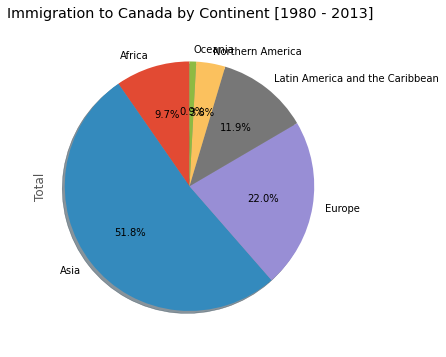

In [274]:
# autopct create %, start angle represent starting point
df_continents['Total'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True,       # add shadow      
                            )

plt.title('Immigration to Canada by Continent [1980 - 2013]')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()

Visual di atas tidak begitu jelas, angka dan teks tumpang tindih dalam beberapa kasus. Mari buat beberapa modifikasi untuk meningkatkan visual:

Hapus label teks pada diagram lingkaran dengan meneruskan legenda dan menambahkannya sebagai legenda terpisah menggunakan plt.legend().

dimajukan persentase untuk di tepat di luar diagram lingkaran dengan memasukkan parameter pct distance.

Lewati satu set warna khusus untuk benua dengan meneruskan parameter warna.

Explode diagram lingkaran untuk menekankan tiga benua terendah (Afrika, Amerika Utara, dan Amerika Latin dan Karibia) dengan memasukkan parameter meledak.

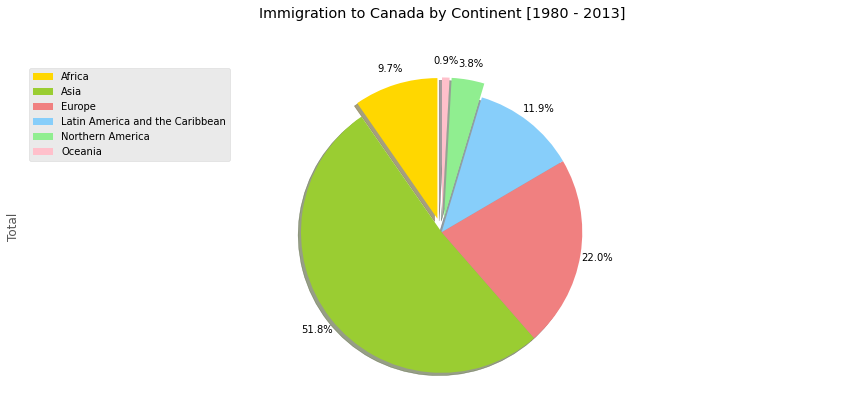

In [275]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1] # ratio for each continent with which to offset each wedge.

df_continents['Total'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Immigration to Canada by Continent [1980 - 2013]', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=df_continents.index, loc='upper left') 

plt.show()


Pertanyaan: Dengan menggunakan diagram lingkaran, telusuri proporsi (persentase) pendatang baru yang dikelompokkan berdasarkan benua pada tahun 2013.

Catatan: Anda mungkin perlu bermain dengan nilai explode untuk memperbaiki nilai irisan yang tumpang tindih.

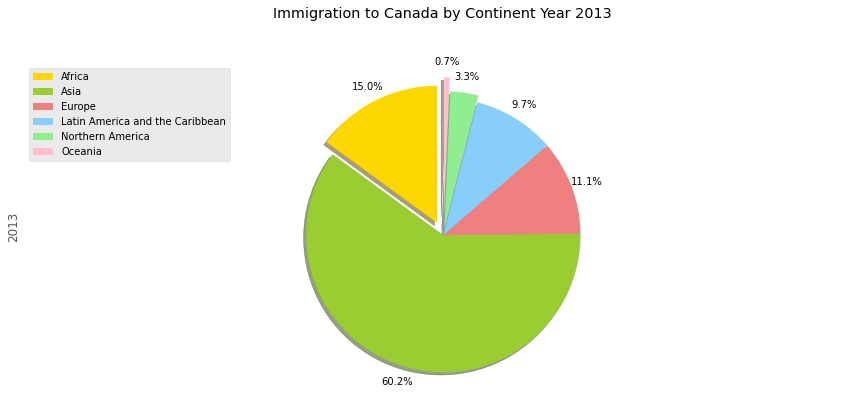

In [276]:
### type your answer here
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.05, 0.15] # ratio for each continent with which to offset each wedge.

df_continents['2013'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Immigration to Canada by Continent Year 2013', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=df_continents.index, loc='upper left') 

plt.show()

# Box Plots
Box plot adalah cara untuk secara statistik merepresentasikan distribusi data melalui lima dimensi utama:

Minimum: Smallest number in the dataset.

First quartile: Middle number between the minimum and the median.

Second quartile (Median): Middle number of the (sorted) dataset.

Third quartile: Middle number between median and maximum.

Maximum: Highest number in the dataset.

<img src="https://i.ibb.co/Sn9GCpL/img2.png" width="350" align="center">



Untuk membuat box plot, kita dapat menggunakan metode kind=box pada plot yang dipanggil pada serie pandas atau dataframe.

Mari kita plot box plot untuk para imigran Jepang antara 1980 - 2013.

Step 1: Dapatkan datasetnya. Meskipun kita mengekstrak data hanya untuk satu negara, kita akan menyimpannya sebagai dataframe. Ini akan membantu kita memanggil metode dataframe.describe() untuk melihat persentil.

In [277]:
# to get a dataframe, place extra square brackets around 'Japan'.
df_japan = df_can.loc[['Japan'], years].transpose()
df_japan.head()

,Japan
1980,701
1981,756
1982,598
1983,309
1984,246


Step 2: Plot by passing in kind='box'.



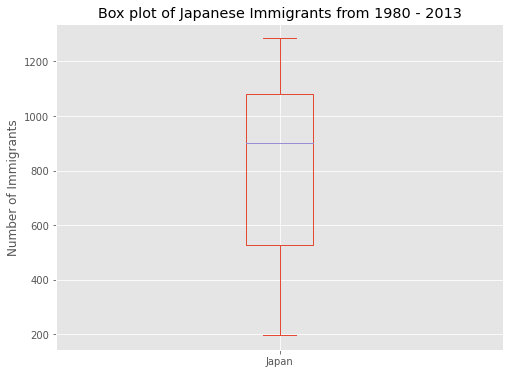

In [278]:
df_japan.plot(kind='box', figsize=(8, 6))

plt.title('Box plot of Japanese Immigrants from 1980 - 2013')
plt.ylabel('Number of Immigrants')

plt.show()

Kami dapat segera membuat beberapa observasi penting dari plot di atas:


Jumlah minimum imigran sekitar 200 (min), 
jumlah maksimum sekitar 1300 (max), 
dan jumlah rata-rata imigran sekitar 900 (median).

25%  untuk periode 1980 - 2013 memiliki jumlah imigran tahunan ~500 atau kurang (Kuartil pertama).
75%  untuk periode 1980 - 2013 memiliki jumlah imigran tahunan ~1100 atau kurang (kuartil ketiga).

Kita bisa melihat angka aktual dengan memanggil metode describe() pada dataframe.

In [279]:
df_japan.describe()

,Japan
count,34.000000
mean,814.911765
std,337.219771
min,198.000000
25%,529.000000
50%,902.000000
75%,1079.000000
max,1284.000000


Salah satu manfaat utama dari box plots adalah membandingkan distribusi beberapa kumpulan data. 

Di salah satu plot sebelumnya, kita mengamati bahwa China dan India memiliki tren imigrasi yang sangat mirip. 

Mari kita analisis kedua negara ini lebih jauh menggunakan box plot.

Pertanyaan: Bandingkan distribusi jumlah pendatang baru dari India dan China periode 1980 - 2013.

Langkah 1: Dapatkan dataset untuk China dan India dan panggil dataframe df_CI.

In [280]:

### type your answer here

df_CI = df_can.loc[(['China', 'India']), years].transpose()
df_CI.head()

,China,India
1980,5123,8880
1981,6682,8670
1982,3308,8147
1983,1863,7338
1984,1527,5704


Let's view the percentages associated with both countries using the describe() method.



In [281]:
df_CI.describe()


,China,India
count,34.000000,34.000000
mean,19410.647059,20350.117647
std,13568.230790,10007.342579
min,1527.000000,4211.000000
25%,5512.750000,10637.750000
50%,19945.000000,20235.000000
75%,31568.500000,28699.500000
max,42584.000000,36210.000000


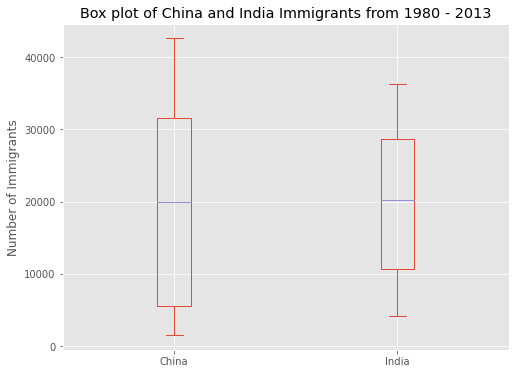

In [282]:
### type your answer here
df_CI.plot(kind='box', figsize=(8, 6))

plt.title('Box plot of China and India Immigrants from 1980 - 2013')
plt.ylabel('Number of Immigrants')

plt.show()

Kita dapat mengamati bahwa, 

meskipun kedua negara memiliki populasi imigran rata-rata yang sama (~ 20.000), 

range populasi imigran China lebih tersebar daripada India. 

Populasi maksimum dari India untuk setiap tahun (36.210) sekitar 15% lebih rendah dari populasi maksimum dari China (42.584).

Jika Kalian lebih suka membuat box plot horizontal, 

kalian dapat meneruskan parameter vert dalam fungsi plot dan menetapkannya ke False. 

Kalian juga dapat menentukan warna yang berbeda jika Kalian tidak suka warna default.

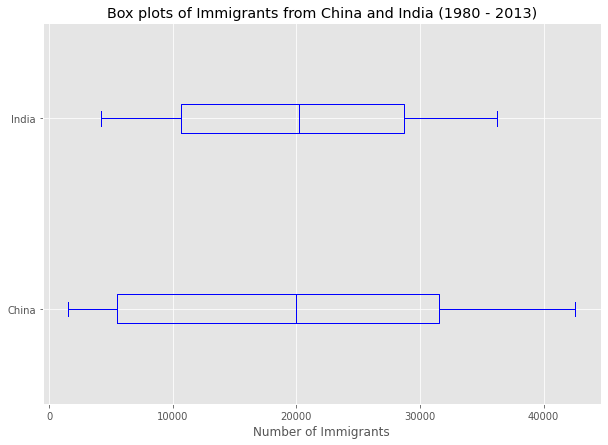

In [283]:
# horizontal box plots
df_CI.plot(kind='box', figsize=(10, 7), color='blue', vert=False)

plt.title('Box plots of Immigrants from China and India (1980 - 2013)')
plt.xlabel('Number of Immigrants')

plt.show()

Subplots

Seringkali kita mungkin ingin memplot beberapa plot dalam figure yang sama. Misalnya, kita ingin melakukan perbandingan box plot secara berdampingan dengan line plot imigrasi China dan India.

Untuk memvisualisasikan beberapa plot bersama-sama, kita dapat membuat figure (overall canvas) dan membaginya menjadi subplots, masing-masing berisi plot. Dengan subplots, kita biasanya bekerja dengan artist layer daripada scripting layer.

Sintaks secara umum adalah:
```
fig = plt.figure() # create figure
ax = fig.add_subplot(nrows, ncols, plot_number) # create subplots
```

Dimana

nrows dan ```ncols``` digunakan untuk membagi gambar menjadi sub-sumbu (nrows * ncols),
* ```nomor_plot``` digunakan untuk mengidentifikasi subplot tertentu yang akan dibuat oleh fungsi ini dalam grid nosional. plot_number dimulai dari 1, bertambah di baris pertama dan memiliki maksimum nrows * ncols seperti yang ditunjukkan di bawah ini.


<img src="https://i.ibb.co/kDCDyqv/img3.png" width="500" align="center">




Kita kemudian dapat menentukan subplot mana yang akan ditempatkan setiap plot dengan meneruskan parameter ax di plot() sebagai berikut:

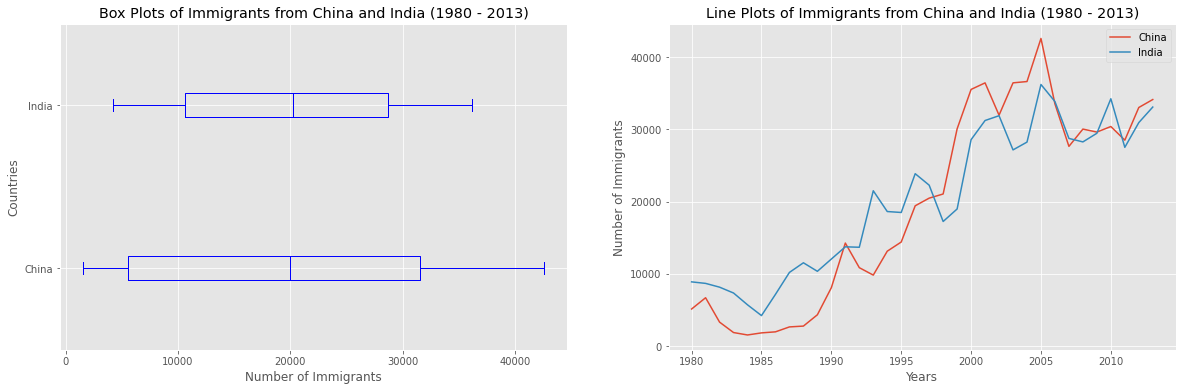

In [284]:
fig = plt.figure() # create figure

ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(122) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

# Subplot 1: Box plot
df_CI.plot(kind='box', color='blue', vert=False, figsize=(20, 6), ax=ax0) # add to subplot 1
ax0.set_title('Box Plots of Immigrants from China and India (1980 - 2013)')
ax0.set_xlabel('Number of Immigrants')
ax0.set_ylabel('Countries')

# Subplot 2: Line plot
df_CI.plot(kind='line', figsize=(20, 6), ax=ax1) # add to subplot 2
ax1.set_title ('Line Plots of Immigrants from China and India (1980 - 2013)')
ax1.set_ylabel('Number of Immigrants')
ax1.set_xlabel('Years')

plt.show()

** * Tip regarding subplot convention **

Dalam kasus ketika nrows, ncols, dan plot_number semuanya kurang dari 10, ada kemudahan sedemikian rupa sehingga angka 3 digit dapat diberikan, di mana ratusan mewakili nrows, puluhan mewakili ncols dan unit mewakili plot_number. Misalnya,

   subplot(211) == subplot(2, 1, 1) #211 sama dengan 2, 1, 1


menghasilkan sub-sumbu dalam gambar yang mewakili plot teratas (yaitu yang pertama) dalam 2 baris kali 1 kolom.

Mari kita coba sesuatu yang lebih advanced.

Sebelumnya kita mengidentifikasi 15 negara teratas berdasarkan total imigrasi dari 1980 - 2013.

Question: Create a box plot to visualize the distribution of the top 15 countries (based on total immigration) grouped by the decades 1980s, 1990s, and 2000s.

Step 1: Dapatkan datasetnya. Dapatkan 15 negara teratas berdasarkan total populasi imigran. Beri nama dataframe df_top15.



In [285]:
df_top15 = df_can.sort_values(['Total'], ascending=False, axis=0).head(15)
df_top15

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
United States of America,Northern America,Northern America,Developed regions,9378,10030,9074,7100,6661,6543,7074,...,8394,9613,9463,10190,8995,8142,7676,7891,8501,241122
Iran (Islamic Republic of),Asia,Southern Asia,Developing regions,1172,1429,1822,1592,1977,1648,1794,...,5837,7480,6974,6475,6580,7477,7479,7534,11291,175923
Sri Lanka,Asia,Southern Asia,Developing regions,185,371,290,197,1086,845,1838,...,4930,4714,4123,4756,4547,4422,3309,3338,2394,148358
Republic of Korea,Asia,Eastern Asia,Developing regions,1011,1456,1572,1081,847,962,1208,...,5832,6215,5920,7294,5874,5537,4588,5316,4509,142581
Poland,Europe,Eastern Europe,Developed regions,863,2930,5881,4546,3588,2819,4808,...,1405,1263,1235,1267,1013,795,720,779,852,139241


Step 2: Buat dataframe baru yang berisi agregat untuk setiap dekade. Salah satu cara untuk melakukannya:

Buat daftar semua tahun dalam dekade 80-an, 90-an, dan 00-an.
Iris kerangka data asli df_can untuk membuat seri untuk setiap dekade dan jumlahkan sepanjang tahun untuk setiap negara.
Menggabungkan tiga seri menjadi bingkai data baru. Panggil kerangka data Anda new_df.

In [286]:
years_80s = list(map(str, range(1980, 1990))) 
years_90s = list(map(str, range(1990, 2000))) 
years_00s = list(map(str, range(2000, 2010))) 

df_80s = df_top15.loc[:, years_80s].sum(axis=1) 
df_90s = df_top15.loc[:, years_90s].sum(axis=1) 
df_00s = df_top15.loc[:, years_00s].sum(axis=1)

new_df = pd.DataFrame({'1980s': df_80s, '1990s': df_90s, '2000s':df_00s}) 
new_df.head()

,1980s,1990s,2000s
India,82154.0,180395.0,303591.0
China,32003.0,161528.0,340385.0
United Kingdom of Great Britain and Northern Ireland,179171.0,261966.0,83413.0
Philippines,60764.0,138482.0,172904.0
Pakistan,10591.0,65302.0,127598.0


Mari pelajari lebih lanjut tentang statistik yang terkait dengan dataframe menggunakan metode describe().



In [287]:
new_df.describe()


,1980s,1990s,2000s
count,15.000000,15.000000,15.000000
mean,44418.333333,85594.666667,97471.533333
std,44190.676455,68237.560246,100583.204205
min,7613.000000,30028.000000,13629.000000
25%,16698.000000,39259.000000,36101.500000
50%,30638.000000,56915.000000,65794.000000
75%,59183.000000,104451.500000,105505.500000
max,179171.000000,261966.000000,340385.000000


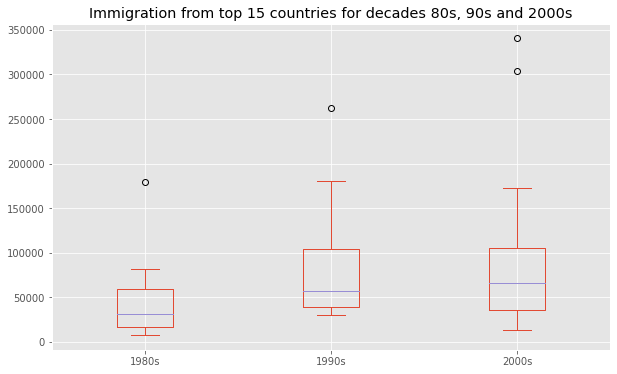

In [288]:
new_df.plot(kind='box', figsize=(10, 6))
plt.title('Immigration from top 15 countries for decades 80s, 90s and 2000s')
plt.show()

Perhatikan bagaimana box plot berbeda dari summary table yang dibuat. Box plot memindai data dan mengidentifikasi outliers. Untuk menjadi outliers, nilai datanya harus:

lebih besar dari Q3 dengan setidaknya 1,5 kali rentang interkuartil (IQR), atau,
lebih kecil dari Q1 setidaknya 1,5 kali IQR.

Mari kita lihat dekade 2000-an sebagai contoh:

Q1 (25%) = 36,101.5
Q3 (75%) = 105,505.5
IQR = Q3 - Q1 = 69,404

Menggunakan definisi outliers, nilai apa pun yang lebih besar dari Q3 sebesar 1,5 kali IQR akan ditandai sebagai outliers.

Outlier > 105,505.5 + (1.5 * 69,404)
Outlier > 209,611.5



In [289]:
# let's check how many entries fall above the outlier threshold 
new_df[new_df['2000s']> 209611.5]

,1980s,1990s,2000s
India,82154.0,180395.0,303591.0
China,32003.0,161528.0,340385.0


China dan India sama-sama dianggap sebagai outliers karena populasi mereka selama dekade tersebut melebihi 209.611,5.

Box plot adalah advanced visualizaiton tool, dan ada banyak opsi dan penyesuaian yang melebihi cakupan section ini. Silakan merujuk ke Matplotlib documentation pada box plot untuk informasi lebih lanjut.

# Scatter Plots
Scatter plot (2D) adalah metode yang berguna untuk membandingkan variabel satu sama lain. Scatter  plot terlihat mirip dengan line plot karena keduanya memetakan variabel **independen dan dependen** pada grafik 2D. Sementara datapoints  dihubungkan bersama oleh garis dalam line plot , datapoints tidak terhubung dalam scatter plot. Data dalam scatter plot dianggap mengekspresikan suatu tren. Dengan analisis lebih lanjut menggunakan tools seperti regresi, kita dapat menghitung hubungan ini secara matematis dan menggunakannya untuk memprediksi tren di luar kumpulan data.

Mari kita mulai dengan menjelajahi yang berikut ini:

Dengan menggunakan scatter plot, mari kita visualisasikan tren imigran total ke Kanada (semua negara digabungkan) untuk tahun 1980 - 2013.

Step 1: Dapatkan datasetnya. Karena kita menggunakan hubungan antara years dan total population, kita akan mengubah years menjadi tipe int .

In [290]:
# we can use the sum() method to get the total population per year
df_tot = pd.DataFrame(df_can[years].sum(axis=0))

# change the years to type int (useful for regression later on)
df_tot.index = map(int, df_tot.index)

# reset the index to put in back in as a column in the df_tot dataframe
df_tot.reset_index(inplace = True)

# rename columns
df_tot.columns = ['year', 'total']

# view the final dataframe
df_tot.head()

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


Step 2: Plot datanya. Di Matplotlib, kita dapat membuat kumpulan scatter plot dengan meneruskan kind='scatter' sebagai argumen plot. Kita juga perlu memasukkan kata kunci x dan y untuk menentukan kolom yang berada pada sumbu x dan y.

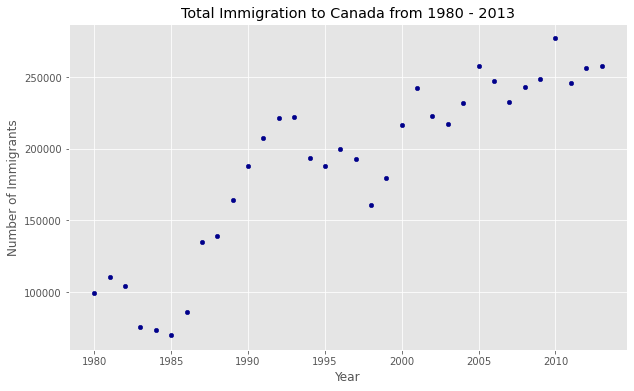

In [291]:
df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.show()

Notice how the scatter plot does not connect the datapoints together. We can clearly observe an upward trend in the data: as the years go by, the total number of immigrants increases. We can mathematically analyze this upward trend using a regression line (line of best fit).

Perhatikan bagaimana scatter plot tidak menghubungkan antar datapoints. Kita dapat dengan jelas mengamati tren peningkatan dalam data: seiring berlalunya waktu, jumlah total imigran meningkat. Kita dapat menganalisis tren naik ini secara matematis menggunakan regression line (line of best fit).

Pertanyaan: Buat diagram pencar dari total imigrasi dari Denmark, Norwegia, dan Swedia ke Kanada dari tahun 1980 hingga 2013?

Langkah 1: Dapatkan datanya:

Buat kerangka data yang terdiri dari angka-angka yang terkait dengan Denmark, Norwegia, dan Swedia saja. Beri nama df_countries.
Jumlahkan nomor imigrasi di ketiga negara untuk setiap tahun dan ubah hasilnya menjadi kerangka data. Beri nama kerangka data baru ini df_total.
Setel ulang indeks di tempatnya.
Ubah nama kolom menjadi tahun dan total.
Menampilkan kerangka data yang dihasilkan.

In [292]:
df_countries = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()
df_total = pd.DataFrame(df_countries.sum(axis=1))
df_total.reset_index(inplace=True)
df_total.columns = ['year', 'total']
df_total['year'] = df_total['year'].astype(int)
df_total.head()

,year,total
0,1980,669.0
1,1981,678.0
2,1982,627.0
3,1983,333.0
4,1984,252.0


Step 2: Generate the scatter plot by plotting the total versus year in df_total.



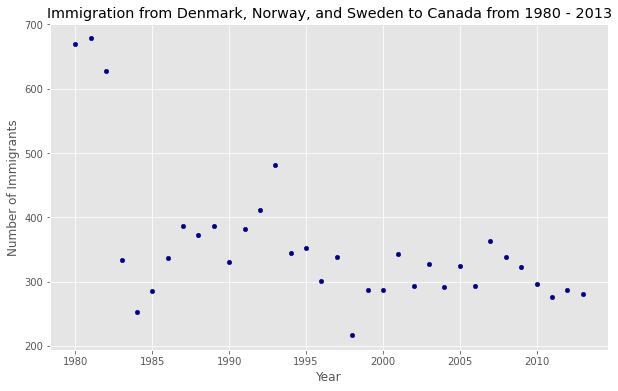

In [293]:
df_total.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')
plt.title('Immigration from Denmark, Norway, and Sweden to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.show()

Bubble Plots (Optional)
Bubble plot adalah variasi dari scatter plot yang menampilkan tiga dimensi data (x, y, z). Titik data diganti dengan bubbles, dan ukuran bubbles ditentukan oleh variabel ketiga 'z', yang juga dikenal sebagai bobot. Di maplotlib, kita bisa mengirimkan array atau skalar ke kata kunci s to plot(), yang berisi bobot setiap titik.

Mari kita mulai dengan menganalisis efek depresi hebat Argentina.

Argentina mengalami great depression dari tahun 1998 - 2002, yang menyebabkan meluasnya pengangguran, kerusuhan, jatuhnya pemerintahan, dan gagal bayar hutang luar negeri negara tersebut. Dalam hal pendapatan, lebih dari 50% orang Argentina miskin, dan tujuh dari sepuluh anak Argentina miskin pada saat krisis tahun 2002.

Mari kita analisis dampak krisis ini, dan bandingkan imigrasi Argentina dengan tetangganya

Mari kita analisis dampak krisis ini, dan bandingkan imigrasi Argentina dengan tetangganya Brasil. Mari kita lakukan itu dengan menggunakan bubble plot imigrasi dari Brasil dan Argentina untuk tahun 1980 - 2013. Kita akan menetapkan bobot gelembung sebagai nilai populasi yang dinormalisasi untuk setiap tahun.

Langkah 1: Dapatkan data untuk Brasil dan Argentina. Seperti pada contoh sebelumnya, kita akan mengonversi Tahun untuk mengetik int dan membawanya ke dalam kerangka data.

In [295]:
df_can_t = df_can[years].transpose() # transposed dataframe

# cast the Years (the index) to type int
df_can_t.index = map(int, df_can_t.index)

# let's label the index. This will automatically be the column name when we reset the index
df_can_t.index.name = 'Year'

# reset index to bring the Year in as a column
df_can_t.reset_index(inplace=True)

# view the changes
df_can_t.head()

/var/folders/gh/bm95p3ys6sd6jvzbfl061_3c0000gn/T/ipykernel_32162/3706571429.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df_can_t.reset_index(inplace=True)


,Year,Palau,Western Sahara,Marshall Islands,New Caledonia,San Marino,American Samoa,Tuvalu,Sao Tome and Principe,Vanuatu,...,Poland,Republic of Korea,Sri Lanka,Iran (Islamic Republic of),United States of America,Pakistan,Philippines,United Kingdom of Great Britain and Northern Ireland,China,India
0,1980,0,0,0,0,1,0,0,0,0,...,863,1011,185,1172,9378,978,6051,22045,5123,8880
1,1981,0,0,0,0,0,1,1,0,0,...,2930,1456,371,1429,10030,972,5921,24796,6682,8670
2,1982,0,0,0,0,0,0,0,0,0,...,5881,1572,290,1822,9074,1201,5249,20620,3308,8147
3,1983,0,0,0,0,0,0,0,0,0,...,4546,1081,197,1592,7100,900,4562,10015,1863,7338
4,1984,0,0,0,0,0,0,1,0,0,...,3588,847,1086,1977,6661,668,3801,10170,1527,5704


Step 2: Create the normalized weights.

Ada beberapa metode normalisasi dalam statistik, masing-masing dengan kegunaannya sendiri. Dalam kasus ini, kita akan menggunakan feature scaling untuk membawa semua nilai ke dalam kisaran [0,1]. Rumus umumnya adalah:

<img src="https://i.ibb.co/KFNP2jh/img5.png" width="300" align="center">



di mana X adalah nilai original, X' adalah nilai yang dinormalisasi. Rumusnya menetapkan nilai maksimal dalam kumpulan data ke 1, dan menetapkan nilai min ke 0. Titik data lainnya diskalakan ke nilai antara 0-1.



In [296]:
# normalize Brazil data
norm_brazil = (df_can_t['Brazil'] - df_can_t['Brazil'].min()) / (df_can_t['Brazil'].max() - df_can_t['Brazil'].min())

# normalize Argentina data
norm_argentina = (df_can_t['Argentina'] - df_can_t['Argentina'].min()) / (df_can_t['Argentina'].max() - df_can_t['Argentina'].min())

In [297]:
norm_brazil

0      0.03282
1     0.036467
2     0.025122
3     0.003647
4     0.006078
5          0.0
6     0.030389
7     0.046191
8     0.106969
9     0.210697
10    0.210697
11    0.302674
12    0.379254
13    0.298217
14    0.176661
15    0.179092
16    0.184765
17    0.186791
18     0.16248
19    0.200972
20    0.289708
21    0.290519
22     0.24919
23    0.287277
24    0.318882
25    0.339951
26    0.425851
27    0.654781
28    0.813614
29    0.963938
30         1.0
31    0.558347
32    0.612642
33    0.641815
Name: Brazil, dtype: Float64

In [298]:

norm_brazil.shape

(34,)

Step 3: Plot the data.

Untuk memplot dua plot pencar yang berbeda dalam satu plot, kita dapat memasukkan sumbu satu plot ke plot lainnya dengan melewatkannya melalui parameter axe.
Kami juga akan meneruskan bobot menggunakan parameter s. Mengingat bahwa bobot yang dinormalisasi adalah antara 0-1, bobot tersebut tidak akan terlihat di plot. Oleh karena itu kami akan:
kalikan bobot dengan 2000 untuk meningkatkannya pada grafik, dan,
tambahkan 10 untuk mengkompensasi nilai min (yang memiliki bobot 0 dan karenanya skala dengan x2000).

ValueError: s must be a scalar, or float array-like with the same size as x and y

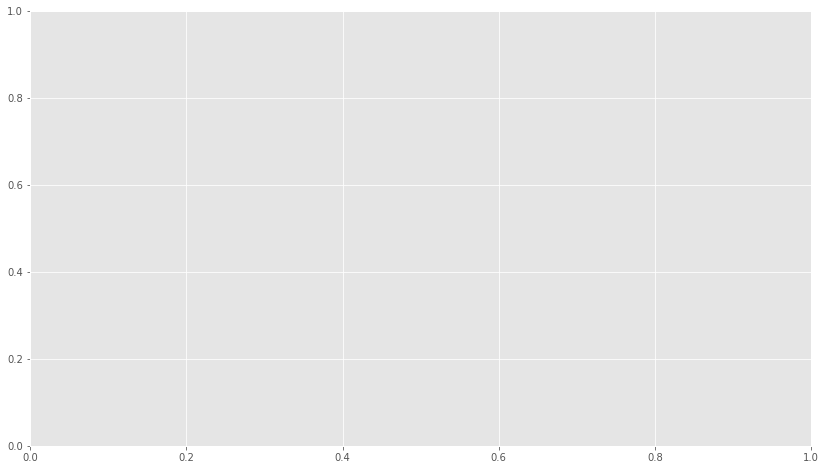

In [299]:
# Brazil
ax0 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Brazil',
                    figsize=(14, 8),
                    alpha=0.5,                  # transparency
                    color='green',
                    s=norm_brazil * 2000 + 10,  # pass in weights 
                    xlim=(1975, 2015)
                   )


In [300]:

# Argentina
ax1 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Argentina',
                    alpha=0.5,
                    color="blue",
                    s=norm_argentina * 2000 + 10,
                    ax = ax0
                   )

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from Brazil and Argentina from 1980 - 2013')
ax0.legend(['Brazil', 'Argentina'], loc='upper left', fontsize='x-large')

ValueError: s must be a scalar, or float array-like with the same size as x and y

Ukuran bubble sesuai dengan besarnya populasi yang berimigrasi untuk tahun itu, dibandingkan dengan data 1980 - 2013. Semakin besar bubble, semakin banyak imigran di tahun tersebut.

Dari plot di atas, kita dapat melihat peningkatan terkait imigrasi dari Argentina selama great depression 1998 - 2002. Kita juga dapat mengamati lonjakan serupa sekitar tahun 1985 hingga 1993. Faktanya, Argentina pernah mengalami great depression dari tahun 1974 - 1990, sebelum dimulainya great depression tahun 1998 - 2002.

Pada note yang sama, Brazil menderita Samba Effect dimana mata uang Brazil turun hampir 35% pada tahun 1999. Ada ketakutan akan krisis keuangan Amerika Selatan karena banyak negara Amerika Selatan sangat bergantung pada ekspor industri dari Brazil. Pemerintah Brasil kemudian mengadopsi program penghematan, dan ekonomi perlahan pulih selama bertahun-tahun, yang berpuncak pada lonjakan pada tahun 2010. Data imigrasi mencerminkan peristiwa ini.

Pertanyaan: Sebelumnya di bagian ini, kami membuat plot kotak untuk membandingkan imigrasi dari Cina dan India ke Kanada. Buat plot gelembung imigrasi dari Cina dan India untuk memvisualisasikan perbedaan apa pun dengan waktu dari tahun 1980 hingga 2013. Anda dapat menggunakan df_can_t yang telah kami definisikan dan gunakan pada contoh sebelumnya.


Step 1: Normalize the data pertaining to China and India.

In [301]:
### type your answer here
norm_china = (df_can_t['China'] - df_can_t['China'].min()) / (df_can_t['China'].max() - df_can_t['China'].min())
norm_india = (df_can_t['India'] - df_can_t['India'].min()) / (df_can_t['India'].max() - df_can_t['India'].min())


Step 2: Generate the bubble plots.



ValueError: s must be a scalar, or float array-like with the same size as x and y

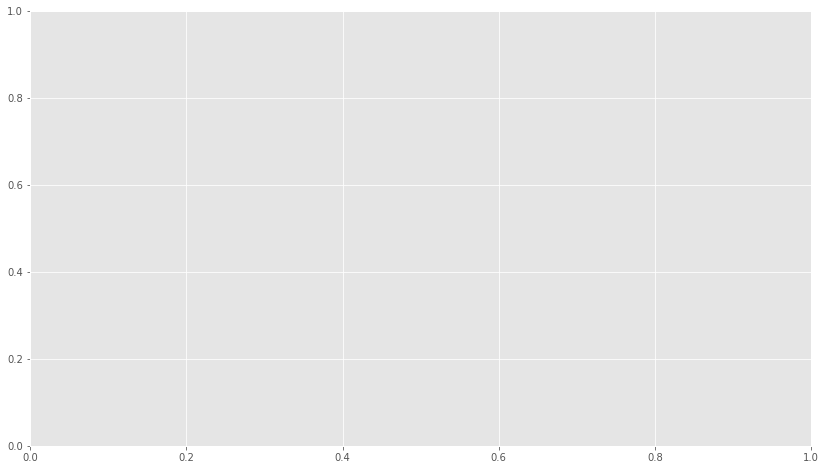

In [302]:
ax0 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='China',
                    figsize=(14, 8),
                    alpha=0.5,                  # transparency
                    color='green',
                    s=norm_china * 1300 + 10,  # pass in weights 
                    xlim=(1975, 2015)
                   )

ax1 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='India',
                    alpha=0.5,
                    color="blue",
                    s=norm_india * 1300 + 10,
                    ax = ax0
                   )

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from China and India from 1980 - 2013')
ax0.legend(['China', 'India'], loc='upper left', fontsize='x-large')


<hr>

In [ ]:
df = pd.read_excel('https://query.data.world/s/jswyvlfesptdycikd37t5ahgahi64f')

In [ ]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2020-152156,2020-11-08,2020-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2020-152156,2020-11-08,2020-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2020-138688,2020-06-12,2020-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2019-108966,2019-10-11,2019-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2019-108966,2019-10-11,2019-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          9994 non-null   int64         
 1   Order ID        9994 non-null   object        
 2   Order Date      9994 non-null   datetime64[ns]
 3   Ship Date       9994 non-null   datetime64[ns]
 4   Ship Mode       9994 non-null   object        
 5   Customer ID     9994 non-null   object        
 6   Customer Name   9994 non-null   object        
 7   Segment         9994 non-null   object        
 8   Country/Region  9994 non-null   object        
 9   City            9994 non-null   object        
 10  State           9994 non-null   object        
 11  Postal Code     9983 non-null   float64       
 12  Region          9994 non-null   object        
 13  Product ID      9994 non-null   object        
 14  Category        9994 non-null   object        
 15  Sub-

In [303]:
segments = list(df["Segment"])
print(segments[:5])

['Consumer', 'Consumer', 'Corporate', 'Consumer', 'Consumer']


In [304]:
rekap_segment = {} 
for s in segments:
    if s in rekap_segment:
        rekap_segment[s] +=1 
    else: 
        rekap_segment[s] = 1

rekap_segment 

{'Consumer': 5191, 'Corporate': 3020, 'Home Office': 1783}

In [305]:
import matplotlib.pyplot as plt 

segment_type = rekap_segment.keys() 
print(segment_type)
jml_segment = rekap_segment.values()

dict_keys(['Consumer', 'Corporate', 'Home Office'])


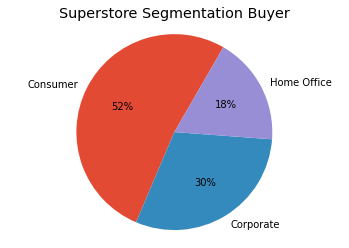

In [306]:
plt.pie(jml_segment, 
        autopct='%1.0f%%',
        labels=segment_type, 
        startangle=60)
plt.axis('equal')
plt.title("Superstore Segmentation Buyer")
plt.show()

In [307]:
date_order = df['Order Date']
date_order.head()

0   2020-11-08
1   2020-11-08
2   2020-06-12
3   2019-10-11
4   2019-10-11
Name: Order Date, dtype: datetime64[ns]

In [308]:
date_order_str = list(map(lambda x: str(x), date_order)) 
date_order_str[:5]

['2020-11-08 00:00:00',
 '2020-11-08 00:00:00',
 '2020-06-12 00:00:00',
 '2019-10-11 00:00:00',
 '2019-10-11 00:00:00']

In [309]:
date_order_2015 = list(filter(lambda x : str(x[:4]) ==  '2019', date_order_str))
date_order_2015[:5]

['2019-10-11 00:00:00',
 '2019-10-11 00:00:00',
 '2019-11-22 00:00:00',
 '2019-11-22 00:00:00',
 '2019-09-25 00:00:00']

In [310]:
rekap_order = {} 
for tgl in date_order_2015:
    if tgl[5:7] in rekap_order:
        rekap_order[tgl[5:7]] +=1
    else:
        rekap_order[tgl[5:7]] =1

print(rekap_order)

{'10': 166, '11': 324, '09': 293, '12': 316, '04': 160, '01': 58, '03': 138, '05': 146, '02': 64, '08': 159, '07': 140, '06': 138}


In [311]:
bulan_order = list(rekap_order.keys()) 
bulan_order.sort()
print(bulan_order)

['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']


In [312]:
jumlah_order = [] 

for bln in bulan_order:
    jumlah_order.append(rekap_order[bln])

print(jumlah_order)

[58, 64, 138, 160, 146, 138, 140, 159, 293, 166, 324, 316]


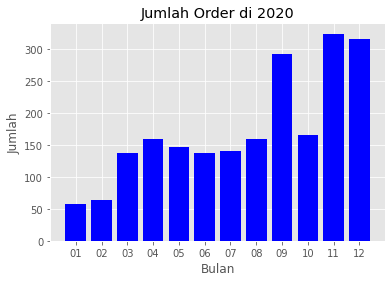

In [313]:
plt.bar(bulan_order,jumlah_order, color="blue")
plt.title("Jumlah Order di 2019")
plt.ylabel("Jumlah")
plt.xlabel("Bulan")
plt.show()

<hr>

plot masukan ke dalam web 

### 1. mengconvert ke dalam file image


In [165]:
import base64
from io import BytesIO

from flask import Flask
from matplotlib.figure import Figure

app = Flask(__name__)


@app.route("/")
def hello():
    # Generate the figure **without using pyplot**.
    fig = Figure()
    ax = fig.subplots()
    ax.plot([1, 2])
    # Save it to a temporary buffer.
    buf = BytesIO()
    fig.savefig(buf, format="png")
    # Embed the result in the html output.
    data = base64.b64encode(buf.getbuffer()).decode("ascii")
    return f"<img src='data:image/png;base64,{data}'/>"